In [ ]:
## Segundo Codigo - Completo
# ==============================================================================
# SIMULACIÓN INVENTARIO
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# ==============================================================================
# BLOQUE 1: CONFIGURACIÓN
# ==============================================================================
TASA_VERANO = 0.063
TASA_SEM_I  = 0.214
TASA_JULIO  = 0.110
TASA_SEM_II = 0.201
TASA_BAJA   = 0.073

DIAS_LIBRES_2025 = [
    (1, 1), (1, 9), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5),
    (4, 17), (4, 18), (4, 19), (5, 1), (11, 3), (11, 4),
    (11, 5), (11, 10), (11, 28), (12, 8), (12, 25)
]

def obtener_demanda_calendario(dia_anio, poblacion_simulada):
    fecha_base = datetime.date(2025, 1, 1)
    fecha_actual = fecha_base + datetime.timedelta(days=dia_anio - 1)
    mes, dia, weekday = fecha_actual.month, fecha_actual.day, fecha_actual.weekday()

    if weekday >= 5: return 0
    if (mes, dia) in DIAS_LIBRES_2025: return 0

    factor = TASA_BAJA
    if mes <= 3 and dia < 31:
        factor = TASA_VERANO
    elif (mes == 3 and dia >= 31) or (mes > 3 and mes < 7) or (mes == 7 and dia <= 12):
        factor = TASA_SEM_I
    elif mes == 7 and dia > 12:
        factor = TASA_JULIO
    elif (mes == 8 and dia >= 18) or (mes > 8 and mes < 11) or (mes == 11 and dia <= 28):
        factor = TASA_SEM_II

    demanda_base = int(poblacion_simulada * factor)
    variabilidad = np.random.uniform(0.99, 1.02)
    return int(demanda_base * variabilidad)

CONFIG_ALMACEN = {
    "CARNES":        {"Max_Stock": 600, "Ref_Gasto_3M": 14000},
    "POLLO":         {"Max_Stock": 600, "Ref_Gasto_3M": 8550},
    "VEGETALES":     {"Max_Stock": 600, "Ref_Gasto_3M": 5000},
    "DESAYUNO":      {"Max_Stock": 100, "Ref_Gasto_3M": 1500},
    "ARROZ":         {"Max_Stock": 500, "Ref_Gasto_3M": 5000},
    "ALIMENTOS_SECO":{"Max_Stock": 200, "Ref_Gasto_3M": 1500},
    "SNACKS":        {"Max_Stock": 200, "Ref_Gasto_3M": 800},
    "PASTAS":        {"Max_Stock": 250, "Ref_Gasto_3M": 2500},
    "ENLATADOS":     {"Max_Stock": 25, "Ref_Gasto_3M": 4500},
    "GRANOS":        {"Max_Stock": 300, "Ref_Gasto_3M": 5000},
    "CONDIMENTOS":   {"Max_Stock": 50, "Ref_Gasto_3M": 5000},
    "BEBIDAS":       {"Max_Stock": 500,"Ref_Gasto_3M": 6500},
    "OTROS/DESECHABLES": {"Max_Stock": 10, "Ref_Gasto_3M": 250}
}

# ==============================================================================
# BLOQUE 2: CSV
# ==============================================================================
csv_data = """Nombre,Precio,Categoria,Racion,Prioridad
POLLO - ALAS,1.76,POLLO,0.40,Critico
POLLO - PECHUGA,1.45,POLLO,0.25,Critico
POLLO - MUSLO ENCUENTRO,1.35,POLLO,0.25,Critico
PUERCO - CHULETA FRESCA,2.38,CARNES,0.25,Critico
PUERCO - LISO,2.83,CARNES,0.25,Critico
PUERCO - RABITO SALADO,2.35,CARNES,0.15,Critico
RES - JARRETE,2.60,CARNES,0.25,Critico
RES - BOFE,1.51,CARNES,0.25,Critico
RES - FALDA,3.06,CARNES,0.25,Critico
RES - HIGADO,1.54,CARNES,0.25,Critico
RES - MONDONGO,3.06,CARNES,0.25,Critico
RES - MOLIDA ESPECIAL,3.02,CARNES,0.20,Critico
ARROZ ESPECIAL (5 LBS),3.30,ARROZ,0.05,Critico
MAIZ EN GRANO (CAJA 10 KG),17.50,ENLATADOS,0.005,Secundario
MAIZ PILADO (5 LBS),3.15,GRANOS,0.06,Secundario
LENTEJAS (1 LB),1.17,GRANOS,0.12,Critico
POROTOS (1 LB),1.25,GRANOS,0.12,Critico
ARVEJA (1 LB),0.85,GRANOS,0.12,Critico
MACARRONES (454 GR),0.80,PASTAS,0.25,Critico
CODITOS (10 LBS),7.40,PASTAS,0.025,Critico
ACEITE VEGETAL (TANQUE 18 L),42.00,CONDIMENTOS,0.0005,Critico
SALSA CHINA (GALON 3.785 L),4.50,CONDIMENTOS,0.002,Secundario
SALSA CONDIMENTADA (GALON 3.785 L),10.00,CONDIMENTOS,0.002,Secundario
SALSA KETCHUP (GALON 3.628g),7.48,CONDIMENTOS,0.003,Secundario
VINAGRE BLANCO (GALON 3.785 L),3.67,CONDIMENTOS,0.002,Secundario
SAL DE COCINA (BULTO 50 LB),12.30,CONDIMENTOS,0.0001,Critico
AJO MOLIDO (1 LB),3.75,CONDIMENTOS,0.005,Secundario
CANELA MOLIDA (2 LB),3.25,CONDIMENTOS,0.001,Secundario
OREGANO MOLIDO (1 LB),3.10,CONDIMENTOS,0.001,Secundario
CONSOME DE POLLO (1/2 LB),2.33,CONDIMENTOS,0.003,Critico
SAZONADORES COMPUESTOS (30 g),4.50,CONDIMENTOS,0.005,Secundario
PASTA DE TOMATE (681 g),4.20,CONDIMENTOS,0.05,Secundario
HARINA DE TRIGO (CAJA de 24 con 240g),52.00,DESAYUNO,0.002,Critico
CAJA DE HUEVOS (CAJA DE 30),5.00,DESAYUNO,0.0333,Secundario
AZUCAR MORENA (BULTO 20 Kg),36.50,CONDIMENTOS,0.001,Critico
GELATINA (22 ONZAS),3.44,ALIMENTOS_SECO,0.01,Lujo
POLVO DE HORNEAR (CAJA 50 sobres de 25g),11.20,DESAYUNO,0.001,Secundario
CREMA DE MAIZ (1 LB),1.10,ALIMENTOS_SECO,0.05,Secundario
CAFE TRADICIONAL (264 g),5.20,BEBIDAS,0.04,Critico
TE VARIADO (CAJA 100 Sobres),5.10,BEBIDAS,0.01,Secundario
BEBIDA INSTANTANEA (96 sobres de 13 g),30.05,BEBIDAS,0.005,Lujo
NECTAR (CAJA 24 Unidades),6.80,BEBIDAS,0.042,Lujo
AGUA EMBOTELLADA (CAJA 24 unidades 600 ml),4.35,BEBIDAS,0.042,Lujo
SODA EN LATA (CAJA 24 Unidades),11.75,BEBIDAS,0.042,Lujo
ATUN (CAJA 140GR),39.60,ENLATADOS,0.003,Lujo
LECHE EVAPORADA (CAJA 24 unidades de 400 g),55.00,ENLATADOS,0.001,Secundario
LECHE CONDENSADA (CAJA 48 unidades 400g),61.00,ENLATADOS,0.002,Secundario
GUANDU EN LATA (CAJA 24 LATAS CON PESO NETO ESCURRIDO DE 120 GR POR LATA),21.10,ENLATADOS,0.005,Secundario
VEGETALES MIXTOS (LATA 24 LATAS DE 425 GRAMOS),19.00,ENLATADOS,0.005,Secundario
GALLETA MARIA (48 Unidades),6.75,SNACKS,0.02,Lujo
CEBOLLA NACIONAL (LIBRA),1.50,VEGETALES,0.02,Secundario
PAPAS (LIBRA),0.80,VEGETALES,0.150,Secundario
ZANAHORIA (LIBRA),1.00,VEGETALES,0.10,Secundario
PIMENTON (LIBRA),2.00,VEGETALES,0.02,Secundario
REPOLLO (LIBRA),1.20,VEGETALES,0.10,Secundario
TOMATE PERITA (2 LB),1.75,VEGETALES,0.10,Secundario
SERVILLETAS (5000 Unidades),15.00,OTROS/DESECHABLES,0.0004,Critico
"""
with open("base_datos_inteligente.csv", "w") as f: f.write(csv_data)
df_catalogo = pd.read_csv("base_datos_inteligente.csv")
CATALOGO_MAESTRO = df_catalogo.to_dict('records')

# ==============================================================================
# BLOQUE 3: MOTOR LOGÍSTICO
# ==============================================================================
class AlmacenProducto:
    def __init__(self, item_data):
        self.nombre = item_data['Nombre']
        self.categoria = item_data['Categoria']
        self.precio = item_data['Precio']
        self.racion_base = item_data['Racion']
        self.prioridad = item_data['Prioridad']

        cfg = CONFIG_ALMACEN.get(self.categoria, CONFIG_ALMACEN.get("OTROS", {}))
        self.max_stock = cfg.get("Max_Stock", 200)

        # RESTAURADO Ratio de llenado objetivo
        # Carnes/Pollos/Veg (Frescos): 20% del tanque.
        # Secos: 50% del tanque.
        self.target_fill_ratio = 0.20 if self.categoria in ["CARNES", "POLLO", "VEGETALES"] else 0.50

        self.stock = self.max_stock * np.random.uniform(0.1, 0.4)
        self.pedidos_en_camino = []
        self.historia_stock = []
        self.historia_compras = []

    def recibir_pedidos(self, dia_actual):
        llegados = [p for p in self.pedidos_en_camino if p[0] <= dia_actual]
        self.pedidos_en_camino = [p for p in self.pedidos_en_camino if p[0] > dia_actual]
        for p in llegados:
            self.stock += p[1]

    def realizar_pedido(self, dia_actual, tipo_pedido, limite_dinero, poblacion_actual):
        gasto_pedido = 0
        compra_msg = ""

        # 1. Definir META DE STOCK (Lógica original basada en % del Max_Stock)
        stock_objetivo = self.max_stock * self.target_fill_ratio

        # Si es emergencia, bajamos la meta para no gastar de más
        if tipo_pedido == 'RELLENO':
            stock_objetivo = self.max_stock * 0.40

        # 2. Calcular Déficit
        en_camino = sum(p[1] for p in self.pedidos_en_camino)
        if en_camino > stock_objetivo * 0.8: return 0, ""

        deficit = stock_objetivo - (self.stock + en_camino)

        if deficit > 0:
            cant_real = deficit
            costo_teorico = cant_real * self.precio

            # 3. Restricción Presupuestaria
            if costo_teorico > limite_dinero:
                cant_real = limite_dinero // self.precio

            if cant_real < 1: return 0, ""

            # Pequeño bonus de seguridad en rellenos
            if tipo_pedido == 'RELLENO' and (cant_real * 1.1 * self.precio) <= limite_dinero:
                 cant_real = int(cant_real * 1.1)

            if cant_real >= 1:
                costo_real = cant_real * self.precio

                # Lead Time (Tiempos de entrega)
                dias_demora = 0
                if self.categoria in ["CARNES", "POLLO", "VEGETALES", "GRANOS", "PASTAS"]:
                    dias_demora = np.random.randint(2, 7)
                else:
                    if tipo_pedido == 'MENSUAL':
                        dias_demora = np.random.randint(15, 30)
                    else:
                        dias_demora = np.random.randint(7, 15)

                dia_llegada = dia_actual + dias_demora
                self.pedidos_en_camino.append((dia_llegada, cant_real, costo_real))

                gasto_pedido = costo_real
                tipo_lbl = "M" if tipo_pedido == 'MENSUAL' else ("Q" if tipo_pedido == 'QUINCENAL' else "R")

                if gasto_pedido > 50 or self.prioridad == 'Critico':
                    compra_msg = f"[Día {dia_actual}] PEDIDO({tipo_lbl}): {self.nombre:<20} | LLEGA: Día {dia_llegada} | ${gasto_pedido:,.2f}"

        return gasto_pedido, compra_msg

    def simular_consumo(self, platos_vendidos, pct_demanda=0.0):
        consumo_real = 0
        if pct_demanda > 0 and self.stock > 0:
            consumo_teorico = (platos_vendidos * pct_demanda) * self.racion_base * np.random.normal(1, 0.05)
            consumo_real = min(consumo_teorico, self.stock)
            self.stock -= consumo_real
        return consumo_real

# FUNCIÓN PRINCIPAL DE EJECUCIÓN
def correr_simulacion_manual():
    print("\n--- CONFIGURACIÓN DE ESCENARIO ---")
    try:
        poblacion_input = int(input(">> Ingrese la Población Total (Alumnos + Personal) para simular: "))
    except ValueError:
        poblacion_input = 2226 # Valor por defecto
        print("(!) Entrada no válida. Se usará población base 2025: 2226")

    print(f"\n--- INICIANDO SIMULACIÓN LOGÍSTICA (Población: {poblacion_input}) ---")

    productos = [AlmacenProducto(item) for item in CATALOGO_MAESTRO]
    prods_by_cat = {}
    for p in productos:
        if p.categoria not in prods_by_cat: prods_by_cat[p.categoria] = []
        prods_by_cat[p.categoria].append(p)

    quincenas_gasto = {i: 0 for i in range(1, 27)}
    log_compras = []
    limites_anuales = {cat: conf["Ref_Gasto_3M"] * 4 for cat, conf in CONFIG_ALMACEN.items()}
    gasto_acumulado_anual = {cat: 0.0 for cat in CONFIG_ALMACEN}
    limite_quincenal_base = 9999.00
    presupuesto_quincena_actual = limite_quincenal_base
    quincena_actual_idx = 1
    total_platos_anio = 0

    idx_granos = 0
    idx_pastas = 0
    lista_granos = prods_by_cat.get('GRANOS', [])
    lista_pastas = prods_by_cat.get('PASTAS', [])

    # === BUCLE DE SIMULACIÓN DÍA A DÍA (1 a 365) ===
    for dia_anio in range(1, 366):

        # 1. GESTIÓN DE QUINCENAS
        nueva_quincena = min(26, (dia_anio // 14) + 1)
        if nueva_quincena > quincena_actual_idx:
            quincena_actual_idx = nueva_quincena
            presupuesto_quincena_actual = limite_quincenal_base

        # 2. CÁLCULO DE DEMANDA DIARIA
        demanda_personas = obtener_demanda_calendario(dia_anio, poblacion_input)
        total_platos_anio += demanda_personas

        # 3. RECEPCIÓN DE PEDIDOS
        for p in productos:
            p.recibir_pedidos(dia_anio)

        # 4. LÓGICA DE REABASTECIMIENTO
        gasto_dia_total = 0

        # NUEVOS DISPARADORES DE FRECUENCIA
        es_dia_quincenal = (dia_anio % 15 == 1) # Para frescos
        es_dia_mensual   = (dia_anio % 30 == 1) # Para secos

        orden_compra = ["ARROZ", "GRANOS", "CARNES", "POLLO", "VEGETALES", "PASTAS", "CONDIMENTOS", "ENLATADOS", "DESAYUNO", "ALIMENTOS_SECO", "SNACKS", "BEBIDAS", "OTROS/DESECHABLES"]
        productos_ordenados = sorted(productos, key=lambda x: orden_compra.index(x.categoria) if x.categoria in orden_compra else 99)

        for p in productos_ordenados:
            tipo_pedido = None
            es_alta_rotacion = p.categoria in ["CARNES", "POLLO", "VEGETALES", "GRANOS", "PASTAS", "ARROZ"]

            demanda_diaria = poblacion_input * 0.20 * p.racion_base
            if demanda_diaria <= 0: demanda_diaria = 0.1
            dias_cobertura_actual = p.stock / demanda_diaria

            if es_alta_rotacion:
                # Frescos: Pedir cada 15 días o si baja de 5 días (emergencia)
                if es_dia_quincenal or dias_cobertura_actual < 5:
                    tipo_pedido = 'QUINCENAL'
            else:
                # Secos: Pedir cada 30 días o si baja de 10 días (emergencia)
                if es_dia_mensual:
                    tipo_pedido = 'MENSUAL'
                elif dias_cobertura_actual < 10:
                    tipo_pedido = 'RELLENO'

            if tipo_pedido:
                dinero_quincena = presupuesto_quincena_actual
                limite_cat = limites_anuales.get(p.categoria, 999999)
                gastado_cat = gasto_acumulado_anual.get(p.categoria, 0)
                dinero_categoria = max(0, limite_cat - gastado_cat)
                limite_final = min(dinero_quincena, dinero_categoria)

                gasto, msg = p.realizar_pedido(dia_anio, tipo_pedido, limite_final, poblacion_input)

                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[p.categoria] += gasto
                    if msg: log_compras.append(msg)

        # 5. DEFINICIÓN DEL MENÚ DEL DÍA
        menu_del_dia = {}

        if prods_by_cat.get('POLLO'): menu_del_dia[np.random.choice(prods_by_cat['POLLO'])] = 0.75
        if prods_by_cat.get('CARNES'): menu_del_dia[np.random.choice(prods_by_cat['CARNES'])] = 0.75

        # GRANOS
        if lista_granos:
            grano_actual = lista_granos[idx_granos]

            if grano_actual.stock <= 0:
                gasto, msg = grano_actual.realizar_pedido(dia_anio, 'RELLENO', 500, poblacion_input)
                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[grano_actual.categoria] += gasto
                    log_compras.append(msg + " (AGOTADO)")

            menu_del_dia[grano_actual] = 1.0

            idx_granos = (idx_granos + 1) % len(lista_granos)

        # PASTAS
        if lista_pastas:
            pasta_actual = lista_pastas[idx_pastas]

            if pasta_actual.stock <= 0:
                gasto, msg = pasta_actual.realizar_pedido(dia_anio, 'RELLENO', 500, poblacion_input)
                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[pasta_actual.categoria] += gasto
                    log_compras.append(msg + " (AGOTADO)")

            menu_del_dia[pasta_actual] = 0.33
            idx_pastas = (idx_pastas + 1) % len(lista_pastas)

        # Bebidas
        bebidas = prods_by_cat.get('BEBIDAS', [])
        if len(bebidas) >= 3:
            sel = np.random.choice(bebidas, 3, replace=False)
            menu_del_dia[sel[0]] = 0.33; menu_del_dia[sel[1]] = 0.33; menu_del_dia[sel[2]] = 0.34

        # Arroz
        for arroz in prods_by_cat.get('ARROZ', []): menu_del_dia[arroz] = 1.0

        # Condimentos
        cond = prods_by_cat.get('CONDIMENTOS', [])
        fijos = [p for p in cond if any(x in p.nombre for x in ["SAL", "ACEITE", "AZUCAR"])]
        vars_c = [p for p in cond if p not in fijos]
        for p in fijos: menu_del_dia[p] = 1.0
        if len(vars_c) >= 2:
            for p in np.random.choice(vars_c, 2, replace=False): menu_del_dia[p] = 1.0

        # Vegetales
        vegs = prods_by_cat.get('VEGETALES', [])
        if len(vegs) >= 2:
            for p in np.random.choice(vegs, 2, replace=False): menu_del_dia[p] = 1.0

        # DESAYUNO
        pct_desayuno = np.random.uniform(0.10, 0.15)
        for p in prods_by_cat.get('DESAYUNO', []):
            menu_del_dia[p] = pct_desayuno

        # Otros y Opcionales
        for p in prods_by_cat.get('OTROS/DESECHABLES', []): menu_del_dia[p] = 1.0
        for cat in ['SNACKS', 'ENLATADOS', 'ALIMENTOS_SECO']:
            for p in prods_by_cat.get(cat, []): menu_del_dia[p] = 0.20

        # 6. REGISTRO DE CONSUMO
        for p in productos:
            pct = menu_del_dia.get(p, 0.0)
            p.simular_consumo(demanda_personas, pct_demanda=pct)
            p.historia_stock.append(p.stock)

        quincenas_gasto[quincena_actual_idx] += gasto_dia_total

    print(f"\n[FIN] Simulación completada. Platos totales: {total_platos_anio:,}")
    return productos, quincenas_gasto, log_compras, limites_anuales, gasto_acumulado_anual

# ==============================================================================
# BLOQUE 4: REPORTE Y VISUALIZACIÓN
# ==============================================================================
def generar_dashboard_total(productos, quincenas, logs, limites_anuales, gasto_acumulado):
    sns.set_style("whitegrid")
    print("\n" + "="*80)
    print("AUDITORÍA (MODELO ORIGINAL - FRECUENCIA 15/30 DÍAS)")
    print("="*80)
    print(f"{'CATEGORÍA':<18} | {'GASTO FINAL':<15} | {'PRESUPUESTO ANUAL':<20} | {'ESTADO'}")
    print("-" * 80)

    total_global = 0
    for cat in CONFIG_ALMACEN:
        gasto = gasto_acumulado.get(cat, 0)
        limite = limites_anuales.get(cat, 0)
        total_global += gasto

        estado = "OK"
        if gasto >= limite * 0.99: estado = "LÍMITE ALCANZADO"

        print(f"{cat:<18} | ${gasto:,.2f}        | ${limite:,.2f}          | {estado}")

    print("-" * 80)
    print(f"TOTAL GENERAL:  ${total_global:,.2f}")
    print("="*80)

    print("\nFLUJO DE CAJA QUINCENAL (Tope $9,999)")
    for q, val in quincenas.items():
        alerta = "OK"
        if val > 9999.01: alerta = "(!) GASTO DE mÁS"
        elif val > 9500: alerta = "(~) AL LÍMITE"
        print(f"Q{q:<2} | ${val:,.2f}   | {alerta}")

    print("\nGenerando gráficas de stock...")
    productos_por_pagina = 4
    total_productos = len(productos)
    total_paginas = (total_productos + productos_por_pagina - 1) // productos_por_pagina
    productos.sort(key=lambda x: x.categoria)

    for pagina in range(total_paginas):
        inicio = pagina * productos_por_pagina
        fin = min((pagina + 1) * productos_por_pagina, total_productos)
        lote_productos = productos[inicio:fin]

        fig, axes = plt.subplots(len(lote_productos), 1, figsize=(12, 3 * len(lote_productos)), sharex=True)
        if len(lote_productos) == 1: axes = [axes]
        fig.suptitle(f'NIVELES DE INVENTARIO (Página {pagina + 1})', fontsize=16, y=1.02)

        for i, p in enumerate(lote_productos):
            ax = axes[i]
            ax.plot(p.historia_stock, color='#2980b9')
            ax.axhline(0, color='red', linestyle='-', linewidth=1)
            ax.set_ylabel(f"{p.nombre}")
            ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    p, q, logs, lim_anual, gasto_anual = correr_simulacion_manual()
    generar_dashboard_total(p, q, logs, lim_anual, gasto_anual)

In [ ]:
pip install customtkinter numpy pandas matplotlib seaborn

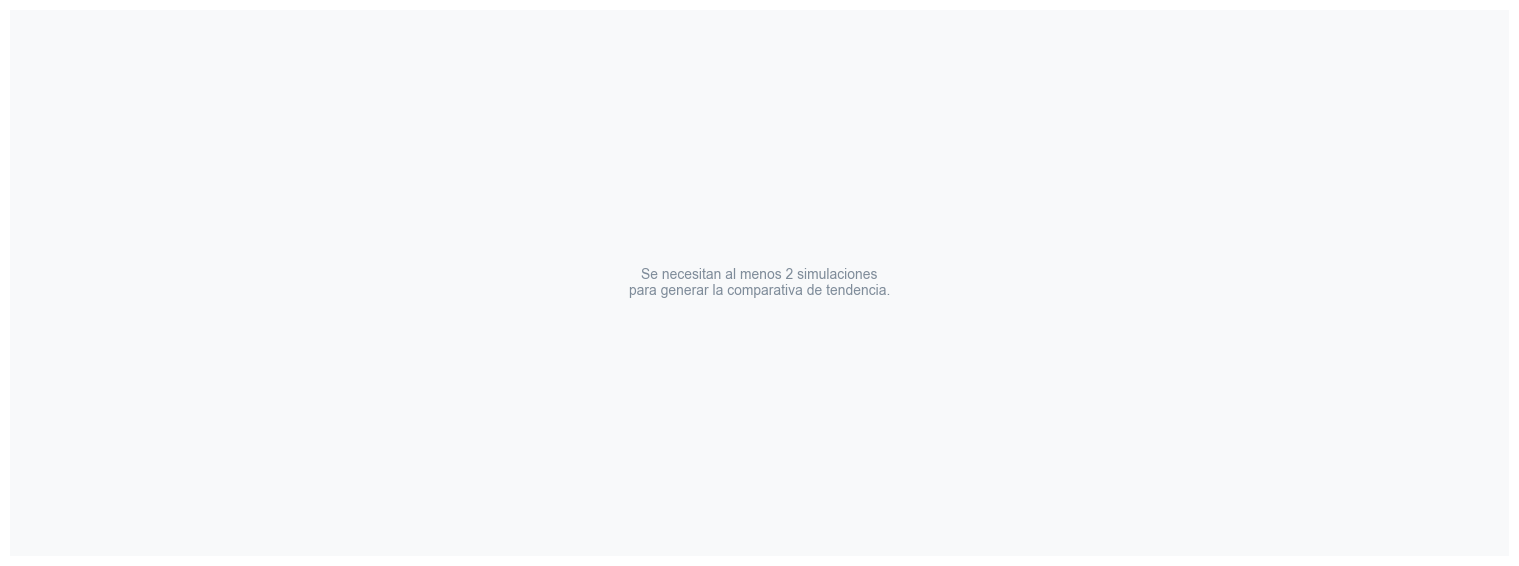

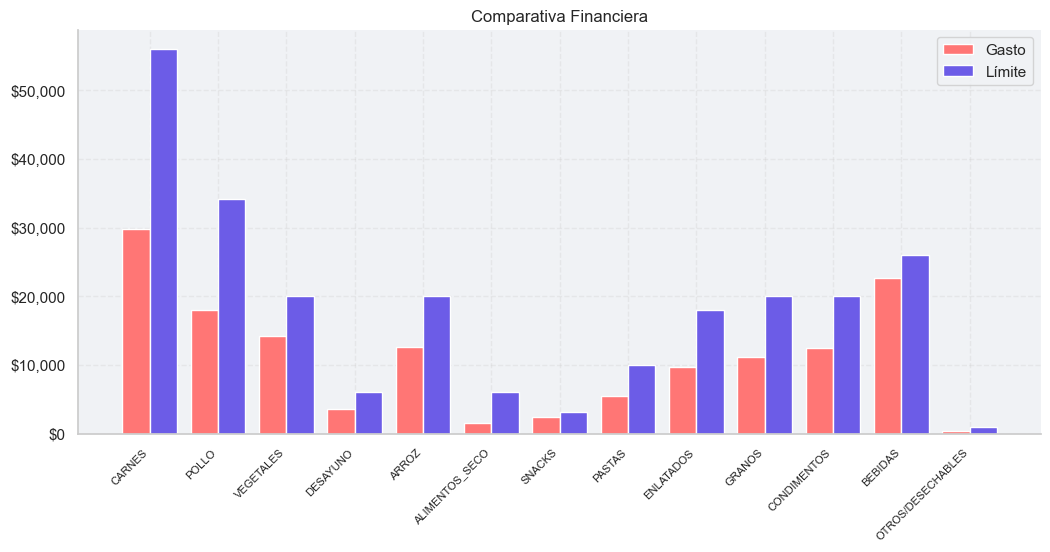

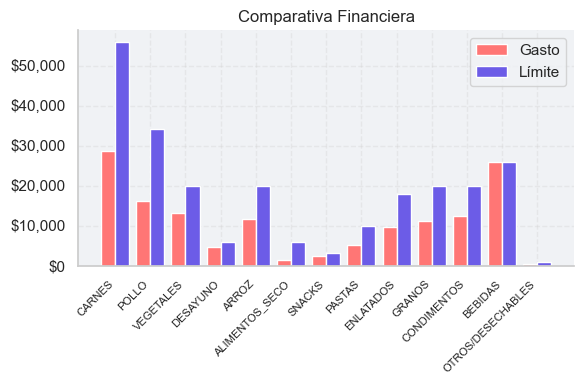

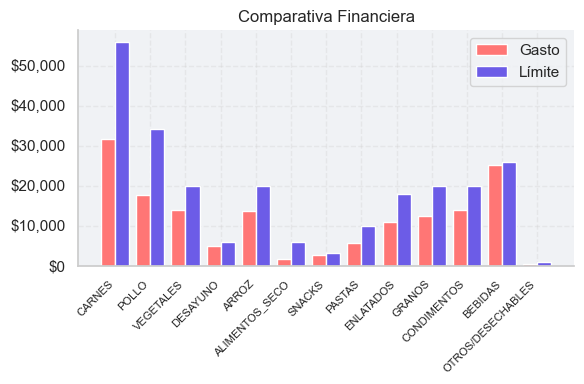

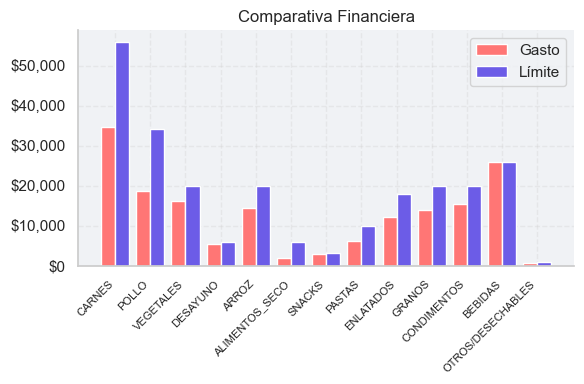

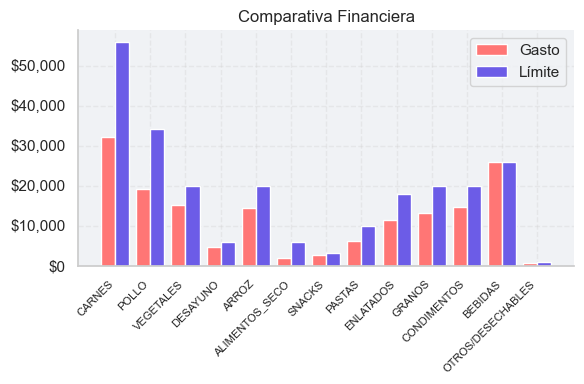

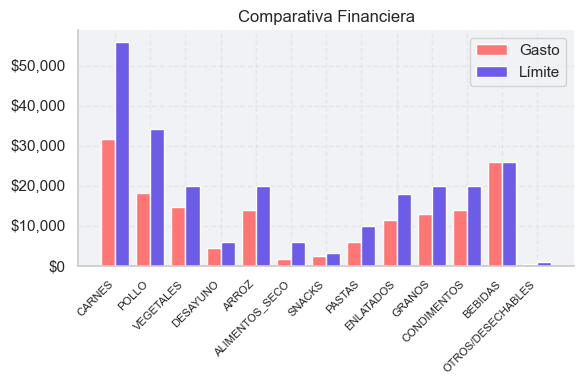

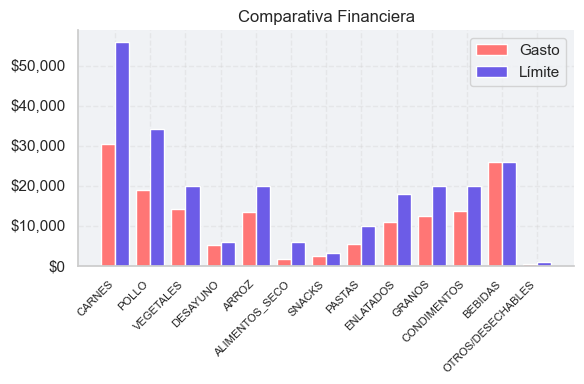

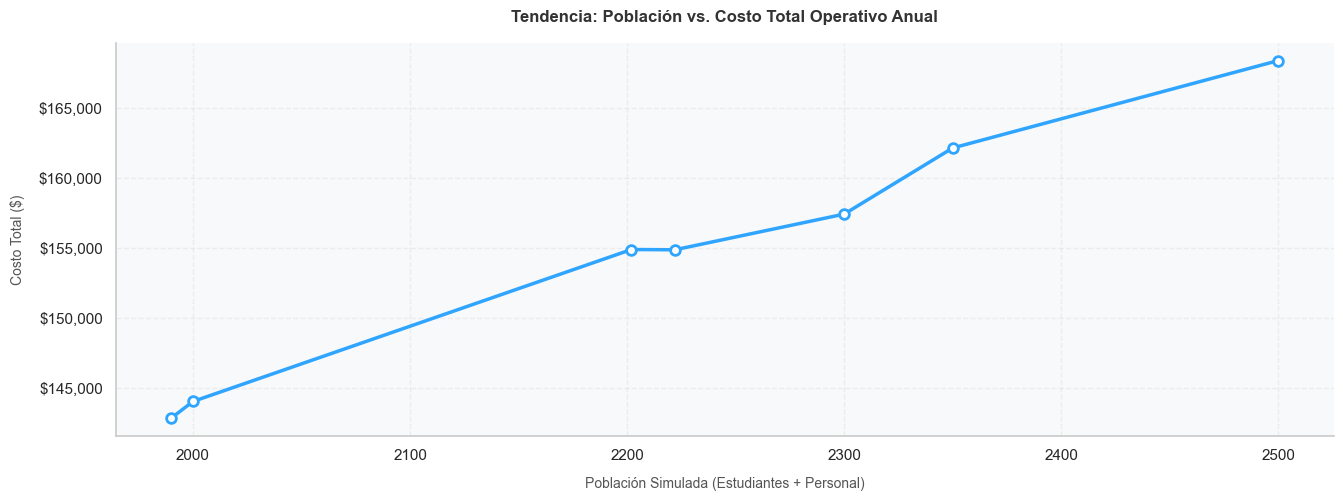

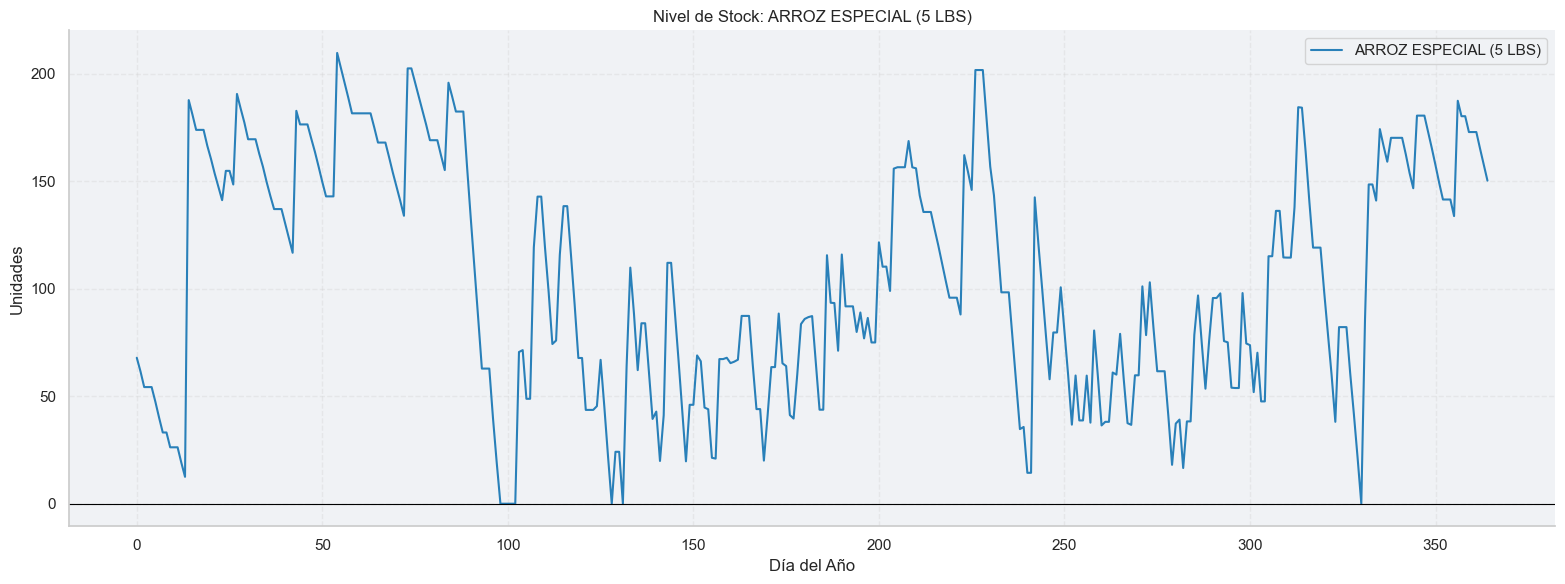

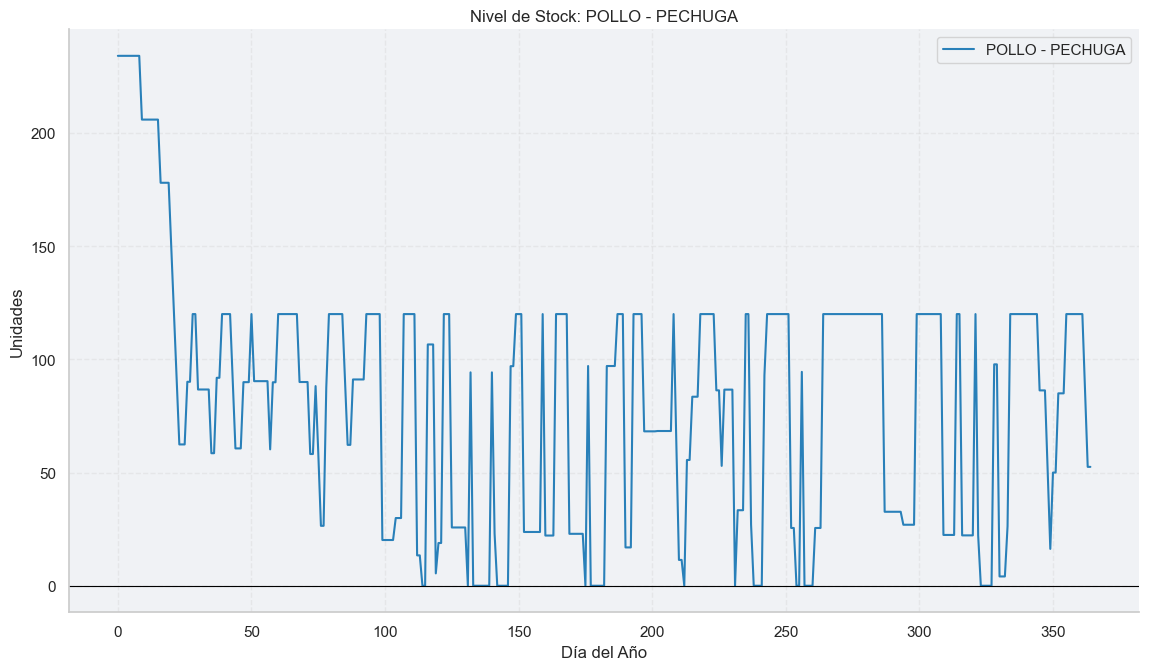

In [3]:
import customtkinter as ctk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sqlite3
import json
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import messagebox
import matplotlib.ticker as mtick

# Configuración global de estilo
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F0F2F5", "figure.facecolor": "#F0F2F5", "grid.linestyle": "--"})

# ==============================================================================
# BLOQUE 0: GESTIÓN DE BASE DE DATOS (SQLITE3)
# ==============================================================================
class GestorBD:
    def __init__(self, db_name="cafeteria_utpcrpo_v3.db"):
        self.db_name = db_name
        self.init_db()

    def init_db(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS simulaciones (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                fecha TIMESTAMP,
                poblacion INTEGER,
                total_gasto REAL
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_categoria (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                categoria TEXT,
                gasto REAL,
                limite REAL,
                estado TEXT,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_quincena (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                quincena INTEGER,
                gasto REAL,
                alerta TEXT,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_stock (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                nombre_producto TEXT,
                historia_json TEXT,
                prioridad TEXT,
                categoria TEXT,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        conn.commit()
        conn.close()

    def guardar_simulacion(self, gasto_anual, limites, quincenas, productos, poblacion):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        total = sum(gasto_anual.values())
        ahora = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        cursor.execute("INSERT INTO simulaciones (fecha, poblacion, total_gasto) VALUES (?, ?, ?)", (ahora, poblacion, total))
        sim_id = cursor.lastrowid

        for cat, gasto in gasto_anual.items():
            limite = limites.get(cat, 0)
            estado = "OK"
            if gasto >= limite * 0.99: estado = "Límite alcanzado"
            cursor.execute('''
                INSERT INTO detalles_categoria (simulacion_id, categoria, gasto, limite, estado)
                VALUES (?, ?, ?, ?, ?)
            ''', (sim_id, cat, gasto, limite, estado))

        for q, val in quincenas.items():
            alerta = "OK"
            if val > 9999.01: alerta = "ERROR CRÍTICO"
            elif val > 9500: alerta = "AL LÍMITE"
            cursor.execute('''
                INSERT INTO detalles_quincena (simulacion_id, quincena, gasto, alerta)
                VALUES (?, ?, ?, ?)
            ''', (sim_id, q, val, alerta))

        for p in productos:
            historia_str = json.dumps(p.historia_stock)
            cursor.execute('''
                INSERT INTO detalles_stock (simulacion_id, nombre_producto, historia_json, prioridad, categoria)
                VALUES (?, ?, ?, ?, ?)
            ''', (sim_id, p.nombre, historia_str, p.prioridad, p.categoria))

        conn.commit()
        conn.close()
        return sim_id

    # NUEVO METODO PARA ELIMINAR
    def eliminar_simulacion(self, sim_id):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        try:
            # Eliminar datos hijos primero
            cursor.execute("DELETE FROM detalles_categoria WHERE simulacion_id=?", (sim_id,))
            cursor.execute("DELETE FROM detalles_quincena WHERE simulacion_id=?", (sim_id,))
            cursor.execute("DELETE FROM detalles_stock WHERE simulacion_id=?", (sim_id,))
            # Eliminar padre
            cursor.execute("DELETE FROM simulaciones WHERE id=?", (sim_id,))
            conn.commit()
            return True
        except Exception as e:
            print(f"Error al eliminar: {e}")
            return False
        finally:
            conn.close()

    def obtener_resumen_home(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT COUNT(*), AVG(total_gasto) FROM simulaciones")
        count, avg = cursor.fetchone()
        conn.close()
        return count, avg

    def obtener_datos_grafica_home(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT poblacion, total_gasto FROM simulaciones ORDER BY poblacion ASC")
        rows = cursor.fetchall()
        conn.close()
        return rows

    def obtener_historial_lista(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT id, fecha, poblacion, total_gasto FROM simulaciones ORDER BY id DESC")
        rows = cursor.fetchall()
        conn.close()
        return rows

    def obtener_simulacion_completa(self, sim_id):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        cursor.execute("SELECT categoria, gasto, limite, estado FROM detalles_categoria WHERE simulacion_id=?", (sim_id,))
        cats = cursor.fetchall()

        cursor.execute("SELECT quincena, gasto, alerta FROM detalles_quincena WHERE simulacion_id=?", (sim_id,))
        quins = cursor.fetchall()

        cursor.execute("SELECT nombre_producto, historia_json, prioridad, categoria FROM detalles_stock WHERE simulacion_id=?", (sim_id,))
        stocks_raw = cursor.fetchall()

        conn.close()

        gasto_anual = {row[0]: row[1] for row in cats}
        limites = {row[0]: row[2] for row in cats}
        quincenas = {row[0]: row[1] for row in quins}

        productos_recuperados = []
        class ProductoDummy:
            def __init__(self, nombre, historia, prioridad, categoria):
                self.nombre = nombre
                self.historia_stock = historia
                self.prioridad = prioridad
                self.categoria = categoria

        for row in stocks_raw:
            nombre = row[0]
            historia = json.loads(row[1])
            prioridad = row[2]
            categoria = row[3] if len(row) > 3 else "OTROS"
            productos_recuperados.append(ProductoDummy(nombre, historia, prioridad, categoria))

        return gasto_anual, limites, quincenas, productos_recuperados


# ==============================================================================
# BLOQUE 1: CONFIGURACIÓN LOGÍSTICA
# ==============================================================================
TASA_VERANO = 0.063
TASA_SEM_I  = 0.214
TASA_JULIO  = 0.110
TASA_SEM_II = 0.201
TASA_BAJA   = 0.073

DIAS_LIBRES_2025 = [
    (1, 1), (1, 9), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5),
    (4, 17), (4, 18), (4, 19), (5, 1), (11, 3), (11, 4),
    (11, 5), (11, 10), (11, 28), (12, 8), (12, 25)
]

def obtener_demanda_calendario(dia_anio, poblacion_simulada):
    fecha_base = datetime.date(2025, 1, 1)
    fecha_actual = fecha_base + datetime.timedelta(days=dia_anio - 1)
    mes, dia, weekday = fecha_actual.month, fecha_actual.day, fecha_actual.weekday()

    if weekday >= 5: return 0
    if (mes, dia) in DIAS_LIBRES_2025: return 0

    factor = TASA_BAJA
    if mes <= 3 and dia < 31:
        factor = TASA_VERANO
    elif (mes == 3 and dia >= 31) or (mes > 3 and mes < 7) or (mes == 7 and dia <= 12):
        factor = TASA_SEM_I
    elif mes == 7 and dia > 12:
        factor = TASA_JULIO
    elif (mes == 8 and dia >= 18) or (mes > 8 and mes < 11) or (mes == 11 and dia <= 28):
        factor = TASA_SEM_II

    demanda_base = int(poblacion_simulada * factor)
    variabilidad = np.random.uniform(0.99, 1.02)
    return int(demanda_base * variabilidad)

CONFIG_ALMACEN = {
    "CARNES":        {"Max_Stock": 600, "Ref_Gasto_3M": 14000},
    "POLLO":         {"Max_Stock": 600, "Ref_Gasto_3M": 8550},
    "VEGETALES":     {"Max_Stock": 600, "Ref_Gasto_3M": 5000},
    "DESAYUNO":      {"Max_Stock": 100, "Ref_Gasto_3M": 1500},
    "ARROZ":         {"Max_Stock": 500, "Ref_Gasto_3M": 5000},
    "ALIMENTOS_SECO":{"Max_Stock": 200, "Ref_Gasto_3M": 1500},
    "SNACKS":        {"Max_Stock": 200, "Ref_Gasto_3M": 800},
    "PASTAS":        {"Max_Stock": 250, "Ref_Gasto_3M": 2500},
    "ENLATADOS":     {"Max_Stock": 25, "Ref_Gasto_3M": 4500},
    "GRANOS":        {"Max_Stock": 300, "Ref_Gasto_3M": 5000},
    "CONDIMENTOS":   {"Max_Stock": 50, "Ref_Gasto_3M": 5000},
    "BEBIDAS":       {"Max_Stock": 500,"Ref_Gasto_3M": 6500},
    "OTROS/DESECHABLES": {"Max_Stock": 10, "Ref_Gasto_3M": 250}
}

# ==============================================================================
# BLOQUE 2: CSV
# ==============================================================================
csv_data = """Nombre,Precio,Categoria,Racion,Prioridad
POLLO - ALAS,1.76,POLLO,0.40,Critico
POLLO - PECHUGA,1.45,POLLO,0.25,Critico
POLLO - MUSLO ENCUENTRO,1.35,POLLO,0.25,Critico
PUERCO - CHULETA FRESCA,2.38,CARNES,0.25,Critico
PUERCO - LISO,2.83,CARNES,0.25,Critico
PUERCO - RABITO SALADO,2.35,CARNES,0.15,Critico
RES - JARRETE,2.60,CARNES,0.25,Critico
RES - BOFE,1.51,CARNES,0.25,Critico
RES - FALDA,3.06,CARNES,0.25,Critico
RES - HIGADO,1.54,CARNES,0.25,Critico
RES - MONDONGO,3.06,CARNES,0.25,Critico
RES - MOLIDA ESPECIAL,3.02,CARNES,0.20,Critico
ARROZ ESPECIAL (5 LBS),3.30,ARROZ,0.05,Critico
MAIZ EN GRANO (CAJA 10 KG),17.50,ENLATADOS,0.005,Secundario
MAIZ PILADO (5 LBS),3.15,GRANOS,0.06,Secundario
LENTEJAS (1 LB),1.17,GRANOS,0.12,Critico
POROTOS (1 LB),1.25,GRANOS,0.12,Critico
ARVEJA (1 LB),0.85,GRANOS,0.12,Critico
MACARRONES (454 GR),0.80,PASTAS,0.25,Critico
CODITOS (10 LBS),7.40,PASTAS,0.025,Critico
ACEITE VEGETAL (TANQUE 18 L),42.00,CONDIMENTOS,0.0005,Critico
SALSA CHINA (GALON 3.785 L),4.50,CONDIMENTOS,0.002,Secundario
SALSA CONDIMENTADA (GALON 3.785 L),10.00,CONDIMENTOS,0.002,Secundario
SALSA KETCHUP (GALON 3.628g),7.48,CONDIMENTOS,0.003,Secundario
VINAGRE BLANCO (GALON 3.785 L),3.67,CONDIMENTOS,0.002,Secundario
SAL DE COCINA (BULTO 50 LB),12.30,CONDIMENTOS,0.0001,Critico
AJO MOLIDO (1 LB),3.75,CONDIMENTOS,0.005,Secundario
CANELA MOLIDA (2 LB),3.25,CONDIMENTOS,0.001,Secundario
OREGANO MOLIDO (1 LB),3.10,CONDIMENTOS,0.001,Secundario
CONSOME DE POLLO (1/2 LB),2.33,CONDIMENTOS,0.003,Critico
SAZONADORES COMPUESTOS (30 g),4.50,CONDIMENTOS,0.005,Secundario
PASTA DE TOMATE (681 g),4.20,CONDIMENTOS,0.05,Secundario
HARINA DE TRIGO (CAJA de 24 con 240g),52.00,DESAYUNO,0.002,Critico
CAJA DE HUEVOS (CAJA DE 30),5.00,DESAYUNO,0.0333,Secundario
AZUCAR MORENA (BULTO 20 Kg),36.50,CONDIMENTOS,0.001,Critico
GELATINA (22 ONZAS),3.44,ALIMENTOS_SECO,0.01,Lujo
POLVO DE HORNEAR (CAJA 50 sobres de 25g),11.20,DESAYUNO,0.001,Secundario
CREMA DE MAIZ (1 LB),1.10,ALIMENTOS_SECO,0.05,Secundario
CAFE TRADICIONAL (264 g),5.20,BEBIDAS,0.04,Critico
TE VARIADO (CAJA 100 Sobres),5.10,BEBIDAS,0.01,Secundario
BEBIDA INSTANTANEA (96 sobres de 13 g),30.05,BEBIDAS,0.005,Lujo
NECTAR (CAJA 24 Unidades),6.80,BEBIDAS,0.042,Lujo
AGUA EMBOTELLADA (CAJA 24 unidades 600 ml),4.35,BEBIDAS,0.042,Lujo
SODA EN LATA (CAJA 24 Unidades),11.75,BEBIDAS,0.042,Lujo
ATUN (CAJA 140GR),39.60,ENLATADOS,0.003,Lujo
LECHE EVAPORADA (CAJA 24 unidades de 400 g),55.00,ENLATADOS,0.001,Secundario
LECHE CONDENSADA (CAJA 48 unidades 400g),61.00,ENLATADOS,0.002,Secundario
GUANDU EN LATA (CAJA 24 LATAS CON PESO NETO ESCURRIDO DE 120 GR POR LATA),21.10,ENLATADOS,0.005,Secundario
VEGETALES MIXTOS (LATA 24 LATAS DE 425 GRAMOS),19.00,ENLATADOS,0.005,Secundario
GALLETA MARIA (48 Unidades),6.75,SNACKS,0.02,Lujo
CEBOLLA NACIONAL (LIBRA),1.50,VEGETALES,0.02,Secundario
PAPAS (LIBRA),0.80,VEGETALES,0.150,Secundario
ZANAHORIA (LIBRA),1.00,VEGETALES,0.10,Secundario
PIMENTON (LIBRA),2.00,VEGETALES,0.02,Secundario
REPOLLO (LIBRA),1.20,VEGETALES,0.10,Secundario
TOMATE PERITA (2 LB),1.75,VEGETALES,0.10,Secundario
SERVILLETAS (5000 Unidades),15.00,OTROS/DESECHABLES,0.0004,Critico
"""
with open("base_datos_inteligente_v2.csv", "w") as f: f.write(csv_data)
df_catalogo = pd.read_csv("base_datos_inteligente_v2.csv")
CATALOGO_MAESTRO = df_catalogo.to_dict('records')

# ==============================================================================
# BLOQUE 3: MOTOR DE SIMULACIÓN
# ==============================================================================
class AlmacenProducto:
    def __init__(self, item_data):
        self.nombre = item_data['Nombre']
        self.categoria = item_data['Categoria']
        self.precio = item_data['Precio']
        self.racion_base = item_data['Racion']
        self.prioridad = item_data['Prioridad']

        cfg = CONFIG_ALMACEN.get(self.categoria, CONFIG_ALMACEN.get("OTROS", {}))
        self.max_stock = cfg.get("Max_Stock", 200)
        self.target_fill_ratio = 0.20 if self.categoria in ["CARNES", "POLLO", "VEGETALES"] else 0.50

        self.stock = self.max_stock * np.random.uniform(0.1, 0.4)
        self.pedidos_en_camino = []
        self.historia_stock = []
        self.historia_compras = []

    def recibir_pedidos(self, dia_actual):
        llegados = [p for p in self.pedidos_en_camino if p[0] <= dia_actual]
        self.pedidos_en_camino = [p for p in self.pedidos_en_camino if p[0] > dia_actual]
        for p in llegados:
            self.stock += p[1]

    def realizar_pedido(self, dia_actual, tipo_pedido, limite_dinero, poblacion_actual):
        gasto_pedido = 0
        compra_msg = ""
        stock_objetivo = self.max_stock * self.target_fill_ratio

        if tipo_pedido == 'RELLENO':
            stock_objetivo = self.max_stock * 0.40

        en_camino = sum(p[1] for p in self.pedidos_en_camino)
        if en_camino > stock_objetivo * 0.8: return 0, ""

        deficit = stock_objetivo - (self.stock + en_camino)

        if deficit > 0:
            cant_real = deficit
            costo_teorico = cant_real * self.precio

            if costo_teorico > limite_dinero:
                cant_real = limite_dinero // self.precio

            if cant_real < 1: return 0, ""

            if tipo_pedido == 'RELLENO' and (cant_real * 1.1 * self.precio) <= limite_dinero:
                 cant_real = int(cant_real * 1.1)

            if cant_real >= 1:
                costo_real = cant_real * self.precio
                dias_demora = 0
                if self.categoria in ["CARNES", "POLLO", "VEGETALES", "GRANOS", "PASTAS"]:
                    dias_demora = np.random.randint(2, 7)
                else:
                    if tipo_pedido == 'MENSUAL':
                        dias_demora = np.random.randint(15, 30)
                    else:
                        dias_demora = np.random.randint(7, 15)

                dia_llegada = dia_actual + dias_demora
                self.pedidos_en_camino.append((dia_llegada, cant_real, costo_real))

                gasto_pedido = costo_real
                tipo_lbl = "M" if tipo_pedido == 'MENSUAL' else ("Q" if tipo_pedido == 'QUINCENAL' else "R")

                if gasto_pedido > 50 or self.prioridad == 'Critico':
                    compra_msg = f"[Día {dia_actual}] PEDIDO({tipo_lbl}): {self.nombre:<20} | LLEGA: Día {dia_llegada} | ${gasto_pedido:,.2f}"

        return gasto_pedido, compra_msg

    def simular_consumo(self, platos_vendidos, pct_demanda=0.0):
        consumo_real = 0
        if pct_demanda > 0 and self.stock > 0:
            consumo_teorico = (platos_vendidos * pct_demanda) * self.racion_base * np.random.normal(1, 0.05)
            consumo_real = min(consumo_teorico, self.stock)
            self.stock -= consumo_real
        return consumo_real

def correr_simulacion_manual(poblacion_input):
    productos = [AlmacenProducto(item) for item in CATALOGO_MAESTRO]
    prods_by_cat = {}
    for p in productos:
        if p.categoria not in prods_by_cat: prods_by_cat[p.categoria] = []
        prods_by_cat[p.categoria].append(p)

    quincenas_gasto = {i: 0 for i in range(1, 27)}
    log_compras = []
    limites_anuales = {cat: conf["Ref_Gasto_3M"] * 4 for cat, conf in CONFIG_ALMACEN.items()}
    gasto_acumulado_anual = {cat: 0.0 for cat in CONFIG_ALMACEN}
    limite_quincenal_base = 9999.00
    presupuesto_quincena_actual = limite_quincenal_base
    quincena_actual_idx = 1

    idx_granos = 0
    idx_pastas = 0
    lista_granos = prods_by_cat.get('GRANOS', [])
    lista_pastas = prods_by_cat.get('PASTAS', [])

    for dia_anio in range(1, 366):
        nueva_quincena = min(26, (dia_anio // 14) + 1)
        if nueva_quincena > quincena_actual_idx:
            quincena_actual_idx = nueva_quincena
            presupuesto_quincena_actual = limite_quincenal_base

        demanda_personas = obtener_demanda_calendario(dia_anio, poblacion_input)

        for p in productos:
            p.recibir_pedidos(dia_anio)

        gasto_dia_total = 0
        es_dia_quincenal = (dia_anio % 15 == 1)
        es_dia_mensual   = (dia_anio % 30 == 1)

        orden_compra = ["ARROZ", "GRANOS", "CARNES", "POLLO", "VEGETALES", "PASTAS", "CONDIMENTOS", "ENLATADOS", "DESAYUNO", "ALIMENTOS_SECO", "SNACKS", "BEBIDAS", "OTROS/DESECHABLES"]
        productos_ordenados = sorted(productos, key=lambda x: orden_compra.index(x.categoria) if x.categoria in orden_compra else 99)

        for p in productos_ordenados:
            tipo_pedido = None
            es_alta_rotacion = p.categoria in ["CARNES", "POLLO", "VEGETALES", "GRANOS", "PASTAS", "ARROZ"]

            demanda_diaria = poblacion_input * 0.20 * p.racion_base
            if demanda_diaria <= 0: demanda_diaria = 0.1
            dias_cobertura_actual = p.stock / demanda_diaria

            if es_alta_rotacion:
                if es_dia_quincenal or dias_cobertura_actual < 5:
                    tipo_pedido = 'QUINCENAL'
            else:
                if es_dia_mensual:
                    tipo_pedido = 'MENSUAL'
                elif dias_cobertura_actual < 10:
                    tipo_pedido = 'RELLENO'

            if tipo_pedido:
                dinero_quincena = presupuesto_quincena_actual
                limite_cat = limites_anuales.get(p.categoria, 999999)
                gastado_cat = gasto_acumulado_anual.get(p.categoria, 0)
                dinero_categoria = max(0, limite_cat - gastado_cat)
                limite_final = min(dinero_quincena, dinero_categoria)

                gasto, msg = p.realizar_pedido(dia_anio, tipo_pedido, limite_final, poblacion_input)

                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[p.categoria] += gasto
                    if msg: log_compras.append(msg)

        menu_del_dia = {}
        if prods_by_cat.get('POLLO'): menu_del_dia[np.random.choice(prods_by_cat['POLLO'])] = 0.75
        if prods_by_cat.get('CARNES'): menu_del_dia[np.random.choice(prods_by_cat['CARNES'])] = 0.75

        if lista_granos:
            grano_actual = lista_granos[idx_granos]
            if grano_actual.stock <= 0:
                gasto, msg = grano_actual.realizar_pedido(dia_anio, 'RELLENO', 500, poblacion_input)
                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[grano_actual.categoria] += gasto
                    log_compras.append(msg + " (AGOTADO)")
            menu_del_dia[grano_actual] = 1.0
            idx_granos = (idx_granos + 1) % len(lista_granos)

        if lista_pastas:
            pasta_actual = lista_pastas[idx_pastas]
            if pasta_actual.stock <= 0:
                gasto, msg = pasta_actual.realizar_pedido(dia_anio, 'RELLENO', 500, poblacion_input)
                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[pasta_actual.categoria] += gasto
                    log_compras.append(msg + " (AGOTADO)")
            menu_del_dia[pasta_actual] = 0.33
            idx_pastas = (idx_pastas + 1) % len(lista_pastas)

        bebidas = prods_by_cat.get('BEBIDAS', [])
        if len(bebidas) >= 3:
            sel = np.random.choice(bebidas, 3, replace=False)
            menu_del_dia[sel[0]] = 0.33; menu_del_dia[sel[1]] = 0.33; menu_del_dia[sel[2]] = 0.34

        for arroz in prods_by_cat.get('ARROZ', []): menu_del_dia[arroz] = 1.0

        cond = prods_by_cat.get('CONDIMENTOS', [])
        fijos = [p for p in cond if any(x in p.nombre for x in ["SAL", "ACEITE", "AZUCAR"])]
        vars_c = [p for p in cond if p not in fijos]
        for p in fijos: menu_del_dia[p] = 1.0
        if len(vars_c) >= 2:
            for p in np.random.choice(vars_c, 2, replace=False): menu_del_dia[p] = 1.0

        vegs = prods_by_cat.get('VEGETALES', [])
        if len(vegs) >= 2:
            for p in np.random.choice(vegs, 2, replace=False): menu_del_dia[p] = 1.0

        pct_desayuno = np.random.uniform(0.10, 0.15)
        for p in prods_by_cat.get('DESAYUNO', []): menu_del_dia[p] = pct_desayuno

        for p in prods_by_cat.get('OTROS/DESECHABLES', []): menu_del_dia[p] = 1.0
        for cat in ['SNACKS', 'ENLATADOS', 'ALIMENTOS_SECO']:
            for p in prods_by_cat.get(cat, []): menu_del_dia[p] = 0.20

        for p in productos:
            pct = menu_del_dia.get(p, 0.0)
            p.simular_consumo(demanda_personas, pct_demanda=pct)
            p.historia_stock.append(p.stock)

        quincenas_gasto[quincena_actual_idx] += gasto_dia_total

    return productos, quincenas_gasto, log_compras, limites_anuales, gasto_acumulado_anual

# ==============================================================================
# SECCIÓN 4: INTERFAZ GRÁFICA
# ==============================================================================

class App(ctk.CTk):
    def __init__(self):
        super().__init__()
        self.db = GestorBD()

        self.title("Sistema de Gestión - Cafeteria UTPCRPO")
        self.geometry("1300x850")
        ctk.set_appearance_mode("Light")
        ctk.set_default_color_theme("blue")

        self.grid_columnconfigure(1, weight=1)
        self.grid_rowconfigure(0, weight=1)

        # --- Sidebar ---
        self.sidebar_frame = ctk.CTkFrame(self, width=200, corner_radius=0, fg_color="#F8F9FA")
        self.sidebar_frame.grid(row=0, column=0, sticky="nsew")
        self.sidebar_frame.grid_rowconfigure(5, weight=1)

        self.btn_menu = ctk.CTkButton(self.sidebar_frame, text="≡ Menu", fg_color="#5E81F4", height=40, width=140, corner_radius=10)
        self.btn_menu.grid(row=0, column=0, padx=20, pady=20, sticky="ew")

        self.btn_home = self.crear_boton_sidebar("🏠 Home", 1, self.mostrar_home)
        self.btn_sim = self.crear_boton_sidebar("📈 Nueva Simulación", 2, self.mostrar_simulacion)
        self.btn_hist = self.crear_boton_sidebar("⇄ Historial", 3, self.mostrar_historial)

        self.btn_exit = ctk.CTkButton(self.sidebar_frame, text="Exit", fg_color="transparent", text_color="black",
                                      anchor="w", command=self.destroy)
        self.btn_exit.grid(row=6, column=0, padx=20, pady=20, sticky="ew")

        # --- Main Area ---
        self.main_frame = ctk.CTkFrame(self, corner_radius=0, fg_color="#F0F2F5")
        self.main_frame.grid(row=0, column=1, sticky="nsew")
        self.main_frame.grid_rowconfigure(1, weight=1)
        self.main_frame.grid_columnconfigure(0, weight=1)

        # Header
        self.header_frame = ctk.CTkFrame(self.main_frame, height=60, fg_color="transparent")
        self.header_frame.grid(row=0, column=0, sticky="ew", padx=20, pady=10)
        self.user_lbl = ctk.CTkLabel(self.header_frame, text="Cafeteria UTPCRPO", font=("Arial", 14, "bold"))
        self.user_lbl.pack(side="right", padx=10)

        self.content_area = ctk.CTkFrame(self.main_frame, fg_color="transparent")
        self.content_area.grid(row=1, column=0, sticky="nsew", padx=20, pady=10)

        self.mostrar_home()

    def crear_boton_sidebar(self, text, row, command):
        btn = ctk.CTkButton(self.sidebar_frame, text=text, fg_color="transparent", text_color="#555",
                            hover_color="#E0E0E0", anchor="w", height=40, font=("Arial", 13), command=command)
        btn.grid(row=row, column=0, padx=20, pady=5, sticky="ew")
        return btn

    def limpiar_contenido(self):
        for widget in self.content_area.winfo_children():
            widget.destroy()

    # ==========================================================================
    # VISTA 1: HOME
    # ==========================================================================
    def mostrar_home(self):
        self.limpiar_contenido()

        count, avg = self.db.obtener_resumen_home()

        cards_frame = ctk.CTkFrame(self.content_area, fg_color="transparent")
        cards_frame.pack(fill="x", pady=(10, 20))

        if count and count > 0:
             self.crear_tarjeta(cards_frame, "Simulaciones", str(count), "#2FA5FF", 0)
             self.crear_tarjeta(cards_frame, "Gasto Promedio", f"${avg:,.0f}", "#7F8C9A", 1)
             self.crear_tarjeta(cards_frame, "Estado", "Activo", "#4CD3F0", 2)
        else:
             self.crear_tarjeta(cards_frame, "Simulaciones", "0", "#2FA5FF", 0)
             self.crear_tarjeta(cards_frame, "Gasto Promedio", "$0", "#7F8C9A", 1)

        msg_frame = ctk.CTkFrame(self.content_area, fg_color="white", corner_radius=15)
        msg_frame.pack(fill="both", expand=True, pady=10)

        chart_container = ctk.CTkFrame(msg_frame, fg_color="transparent")
        chart_container.pack(side="top", fill="both", expand=True, padx=20, pady=(20, 10))

        fig, ax = plt.subplots(figsize=(6, 3.5), dpi=100)
        fig.patch.set_facecolor('#FFFFFF')
        ax.set_facecolor('#F8F9FA')

        canvas = FigureCanvasTkAgg(fig, master=chart_container)
        canvas.get_tk_widget().pack(fill="both", expand=True)

        self.dibujar_grafica_home(ax, canvas)

        text_container = ctk.CTkFrame(msg_frame, fg_color="transparent")
        text_container.pack(side="bottom", fill="x", pady=(10, 20), anchor="s")

        if count and count > 0:
             ctk.CTkLabel(text_container, text="Análisis de tendencia basado en las simulaciones realizadas.",
                          font=("Arial", 14), text_color="#555").pack(anchor="center")
        else:
             ctk.CTkLabel(text_container, text="Bienvenido. Ingrese una población en 'Nueva Simulación' para comenzar a generar datos.",
                          font=("Arial", 16, "bold"), text_color="#333").pack(anchor="center", pady=(0, 5))
             ctk.CTkLabel(text_container, text="La gráfica comparativa aparecerá aquí una vez realice al menos dos simulaciones.",
                          font=("Arial", 12), text_color="#777").pack(anchor="center")

    def dibujar_grafica_home(self, ax, canvas):
        ax.clear()
        rows = self.db.obtener_datos_grafica_home()

        if len(rows) < 2:
             ax.text(0.5, 0.5, "Se necesitan al menos 2 simulaciones\npara generar la comparativa de tendencia.",
                     ha='center', va='center', fontsize=10, color='#7F8C9A')
             ax.set_xticks([])
             ax.set_yticks([])
             ax.spines['top'].set_visible(False)
             ax.spines['right'].set_visible(False)
             ax.spines['bottom'].set_visible(False)
             ax.spines['left'].set_visible(False)
        else:
            pops = [r[0] for r in rows]
            costs = [r[1] for r in rows]

            ax.plot(pops, costs, marker='o', linestyle='-', linewidth=2.5, color='#2FA5FF', markersize=7, markerfacecolor='white', markeredgewidth=2, label="Costo Total")

            ax.set_title("Tendencia: Población vs. Costo Total Operativo Anual", fontsize=12, fontweight='bold', color='#333333', pad=15)
            ax.set_xlabel("Población Simulada (Estudiantes + Personal)", fontsize=10, color='#555555', labelpad=10)
            ax.set_ylabel("Costo Total ($)", fontsize=10, color='#555555', labelpad=10)
            ax.grid(True, linestyle='--', alpha=0.5, color='#E0E0E0')
            ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
            sns.despine(ax=ax)

        plt.tight_layout()
        canvas.draw()

    def crear_tarjeta(self, parent, titulo, valor, color, col_idx):
        card = ctk.CTkFrame(parent, fg_color=color, corner_radius=15, height=100)
        card.pack(side="left", expand=True, fill="both", padx=10)
        inner = ctk.CTkFrame(card, fg_color="transparent")
        inner.pack(expand=True, fill="both", padx=20, pady=20)
        ctk.CTkLabel(inner, text=titulo, text_color="white", font=("Arial", 14), anchor="w").pack(anchor="w")
        ctk.CTkLabel(inner, text=valor, text_color="white", font=("Arial", 24, "bold"), anchor="e").pack(anchor="e")

    # ==========================================================================
    # VISTA 2: NUEVA SIMULACIÓN
    # ==========================================================================
    def mostrar_simulacion(self):
        self.limpiar_contenido()
        title = ctk.CTkLabel(self.content_area, text="NUEVA SIMULACIÓN - MODELO LOGÍSTICO COMPLETO", font=("Arial", 16, "bold"), anchor="w")
        title.pack(anchor="w", pady=(0, 20))

        input_frame = ctk.CTkFrame(self.content_area, fg_color="white", corner_radius=10)
        input_frame.pack(fill="x", pady=10)

        ctk.CTkLabel(input_frame, text="Población a Simular:", font=("Arial", 12)).pack(side="left", padx=20, pady=10)
        self.entry_poblacion = ctk.CTkEntry(input_frame, placeholder_text="Ej: 2226", width=150)
        self.entry_poblacion.pack(side="left", padx=10)

        btn_run = ctk.CTkButton(input_frame, text="▶ Iniciar Simulación", fg_color="#2FA5FF",
                                command=self.validar_y_correr, height=35)
        btn_run.pack(side="right", padx=20)

        self.resultados_frame = ctk.CTkFrame(self.content_area, fg_color="transparent")
        self.resultados_frame.pack(fill="both", expand=True)
        ctk.CTkLabel(self.resultados_frame, text="Ingrese la población y presione Iniciar...", text_color="gray").pack(pady=50)

    def validar_y_correr(self):
        texto = self.entry_poblacion.get()
        if not texto.isdigit():
            messagebox.showerror("Error", "Por favor ingrese un número entero válido para la población.")
            return

        poblacion = int(texto)
        if poblacion <= 0:
            messagebox.showerror("Error", "La población debe ser mayor a 0.")
            return

        p, q, logs, lim_anual, gasto_anual = correr_simulacion_manual(poblacion)

        self.db.guardar_simulacion(gasto_anual, lim_anual, q, p, poblacion)
        messagebox.showinfo("Éxito", f"Simulación completada para {poblacion} personas.")

        datos = {"gasto_anual": gasto_anual, "limites": lim_anual, "quincenas": q, "productos_obj": p}
        self.visualizar_resultados(self.resultados_frame, datos, modo="live")

    # ==========================================================================
    # VISTA 3: HISTORIAL (ELIMINAR FUNCIONAL)
    # ==========================================================================
    def mostrar_historial(self):
        self.limpiar_contenido()
        title = ctk.CTkLabel(self.content_area, text="HISTORIAL DE SIMULACIONES", font=("Arial", 16, "bold"), anchor="w")
        title.pack(anchor="w", pady=(0, 20))

        hist_container = ctk.CTkFrame(self.content_area, fg_color="transparent")
        hist_container.pack(fill="both", expand=True)

        list_frame = ctk.CTkScrollableFrame(hist_container, width=300, label_text="Registros")
        list_frame.pack(side="left", fill="y", padx=(0, 10))

        rows = self.db.obtener_historial_lista()
        if not rows:
            ctk.CTkLabel(list_frame, text="Sin registros").pack()

        for row in rows:
            sim_id, fecha, pob, total = row

            # Frame contenedor de la fila
            row_frame = ctk.CTkFrame(list_frame, fg_color="transparent")
            row_frame.pack(fill="x", pady=2)

            txt = f"#{sim_id} | {fecha[:16]}\nPoblación: {pob} | Total: ${total:,.0f}"

            # Botón Ver (Izquierda)
            btn_view = ctk.CTkButton(row_frame, text=txt, fg_color="white", text_color="black",
                                     hover_color="#ddd", anchor="w", height=50,
                                     command=lambda i=sim_id: self.cargar_historial_detalle(i))
            btn_view.pack(side="left", fill="x", expand=True, padx=(0, 5))

            # Botón Eliminar (Derecha)
            btn_del = ctk.CTkButton(row_frame, text="X", fg_color="#FF5555", hover_color="#CC0000", width=40, height=50,
                                    command=lambda i=sim_id: self.eliminar_simulacion_accion(i))
            btn_del.pack(side="right")

        self.hist_detail_frame = ctk.CTkFrame(hist_container, fg_color="white", corner_radius=15)
        self.hist_detail_frame.pack(side="right", fill="both", expand=True)
        ctk.CTkLabel(self.hist_detail_frame, text="Seleccione una simulación", text_color="gray").pack(expand=True)

    def eliminar_simulacion_accion(self, sim_id):
        if messagebox.askyesno("Confirmar", "¿Está seguro de eliminar esta simulación permanentemente?"):
            if self.db.eliminar_simulacion(sim_id):
                self.mostrar_historial() # Recargar la lista
            else:
                messagebox.showerror("Error", "No se pudo eliminar la simulación.")

    def cargar_historial_detalle(self, sim_id):
        for w in self.hist_detail_frame.winfo_children(): w.destroy()
        gasto, limites, quincenas, prods = self.db.obtener_simulacion_completa(sim_id)
        datos = {"gasto_anual": gasto, "limites": limites, "quincenas": quincenas, "productos_obj": prods}
        self.visualizar_resultados(self.hist_detail_frame, datos, modo="historia")

    # ==========================================================================
    # VISUALIZACIÓN (TABLAS + GRÁFICAS)
    # ==========================================================================
    def visualizar_resultados(self, parent_frame, datos, modo="live"):
        for w in parent_frame.winfo_children(): w.destroy()

        tabview = ctk.CTkTabview(parent_frame)
        tabview.pack(fill="both", expand=True, padx=10, pady=10)

        tab_tabla = tabview.add("Reporte Financiero")
        tab_graf = tabview.add("Análisis Gráfico")

        # --- TABLA ---
        scroll_tablas = ctk.CTkScrollableFrame(tab_tabla, fg_color="transparent")
        scroll_tablas.pack(fill="both", expand=True)

        headers = ["Categoría", "Gasto Final", "Presupuesto", "Estado"]
        self.crear_tabla_header(scroll_tablas, headers, "#008B9F")

        row_idx = 1
        for cat in CONFIG_ALMACEN:
            g = datos["gasto_anual"].get(cat, 0)
            l = datos["limites"].get(cat, 0)
            est = "OK"
            if g >= l * 0.99: est = "Límite"
            self.crear_tabla_row(scroll_tablas, [cat, f"${g:,.2f}", f"${l:,.2f}", est], row_idx)
            row_idx += 1

        ctk.CTkLabel(scroll_tablas, text=f"TOTAL: ${sum(datos['gasto_anual'].values()):,.2f}", font=("Arial", 12, "bold")).grid(row=row_idx, column=0, columnspan=4, pady=10, sticky="w")
        row_idx += 1

        ctk.CTkLabel(scroll_tablas, text="Quincenas (Primeras 8)", font=("Arial", 12, "bold")).grid(row=row_idx, column=0, pady=10, sticky="w")
        row_idx += 1

        for q, val in list(datos["quincenas"].items())[:8]:
            alert = "CRÍTICO" if val > 9999 else "OK"
            self.crear_tabla_row(scroll_tablas, [f"Q{q}", f"${val:,.2f}", alert, ""], row_idx)
            row_idx += 1

        # --- GRÁFICAS ---
        ctrl_frame = ctk.CTkFrame(tab_graf, fg_color="transparent")
        ctrl_frame.pack(fill="x", pady=5)

        opciones_graficas = ["Presupuesto vs Gasto", "Flujo Quincenal"]

        if datos.get("productos_obj"):
            nombres_productos = sorted([p.nombre for p in datos["productos_obj"]])
            for nombre in nombres_productos:
                opciones_graficas.append(f"Stock: {nombre}")

        combo = ctk.CTkOptionMenu(ctrl_frame, values=opciones_graficas, width=250,
                                  command=lambda x: self.dibujar_grafica(x, datos, ax, canvas))
        combo.pack(side="left", padx=10)

        fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
        fig.patch.set_facecolor('white')
        canvas = FigureCanvasTkAgg(fig, master=tab_graf)
        canvas.get_tk_widget().pack(fill="both", expand=True, padx=10, pady=10)
        self.dibujar_grafica(opciones_graficas[0], datos, ax, canvas)

    def dibujar_grafica(self, opcion, datos, ax, canvas):
        ax.clear()

        if opcion == "Presupuesto vs Gasto":
            g = datos["gasto_anual"]
            l = datos["limites"]
            cats = list(g.keys())
            x = np.arange(len(cats))
            ax.bar(x - 0.2, [g[c] for c in cats], 0.4, label='Gasto', color='#FF7675')
            ax.bar(x + 0.2, [l[c] for c in cats], 0.4, label='Límite', color='#6C5CE7')
            ax.set_xticks(x)
            ax.set_xticklabels(cats, rotation=45, ha="right", fontsize=8)
            ax.legend()
            ax.set_title("Comparativa Financiera")
            ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

        elif opcion == "Flujo Quincenal":
            q = datos["quincenas"]
            ax.plot(list(q.keys()), list(q.values()), marker='o', color='#2FA5FF')
            ax.axhline(9999, color='red', linestyle='--', label='Tope ($9,999)')
            ax.set_xlabel("Quincena")
            ax.set_ylabel("Gasto Acumulado ($)")
            ax.set_title("Flujo de Caja Quincenal")
            ax.legend()
            ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

        elif opcion.startswith("Stock:"):
            nombre_producto = opcion.replace("Stock: ", "")
            encontrado = None
            for p in datos.get("productos_obj", []):
                if p.nombre == nombre_producto:
                    encontrado = p
                    break

            if encontrado:
                ax.plot(encontrado.historia_stock, label=encontrado.nombre, linewidth=1.5, color='#2980b9')
                ax.set_title(f"Nivel de Stock: {encontrado.nombre}")
                ax.set_xlabel("Día del Año")
                ax.set_ylabel("Unidades")
                ax.axhline(0, color='black', linewidth=0.8, linestyle='-')
                ax.legend()
            else:
                ax.text(0.5, 0.5, "Datos no encontrados", ha='center')

        ax.grid(True, alpha=0.3)
        sns.despine(ax=ax)
        plt.tight_layout()
        canvas.draw()

    def crear_tabla_header(self, parent, headers, color):
        for i, h in enumerate(headers):
            ctk.CTkLabel(parent, text=h, fg_color=color, text_color="white", width=100).grid(row=0, column=i, padx=1, sticky="ew")

    def crear_tabla_row(self, parent, values, r):
        for i, v in enumerate(values):
            ctk.CTkLabel(parent, text=v, fg_color="white", text_color="black").grid(row=r, column=i, padx=1, pady=1, sticky="ew")

if __name__ == "__main__":
    app = App()
    app.mainloop()

In [ ]:
import customtkinter as ctk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sqlite3
import json
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import messagebox
import matplotlib.ticker as mtick

# Configuración global de estilo
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F0F2F5", "figure.facecolor": "#F0F2F5", "grid.linestyle": "--"})

# ==============================================================================
# BLOQUE 0: GESTIÓN DE BASE DE DATOS (SQLITE3)
# ==============================================================================
class GestorBD:
    def __init__(self, db_name="cafeteria_utpcrpo_v4.db"): # Cambie version db
        self.db_name = db_name
        self.init_db()

    def init_db(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS simulaciones (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                fecha TIMESTAMP,
                poblacion INTEGER,
                total_gasto REAL
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_categoria (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                categoria TEXT,
                gasto REAL,
                limite REAL,
                estado TEXT,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_quincena (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                quincena INTEGER,
                gasto REAL,
                alerta TEXT,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_stock (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                nombre_producto TEXT,
                historia_json TEXT,
                prioridad TEXT,
                categoria TEXT,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        # NUEVA TABLA: DETALLES DE COMPRAS INDIVIDUALES
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detalles_compras (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                simulacion_id INTEGER,
                dia INTEGER,
                producto TEXT,
                costo REAL,
                FOREIGN KEY(simulacion_id) REFERENCES simulaciones(id)
            )
        ''')

        conn.commit()
        conn.close()

    def guardar_simulacion(self, gasto_anual, limites, quincenas, productos, poblacion, lista_compras):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        total = sum(gasto_anual.values())
        ahora = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        cursor.execute("INSERT INTO simulaciones (fecha, poblacion, total_gasto) VALUES (?, ?, ?)", (ahora, poblacion, total))
        sim_id = cursor.lastrowid

        for cat, gasto in gasto_anual.items():
            limite = limites.get(cat, 0)
            estado = "OK"
            if gasto >= limite * 0.99: estado = "Límite alcanzado"
            cursor.execute('''
                INSERT INTO detalles_categoria (simulacion_id, categoria, gasto, limite, estado)
                VALUES (?, ?, ?, ?, ?)
            ''', (sim_id, cat, gasto, limite, estado))

        for q, val in quincenas.items():
            alerta = "OK"
            if val > 9999.01: alerta = "ERROR CRÍTICO"
            elif val > 9500: alerta = "AL LÍMITE"
            cursor.execute('''
                INSERT INTO detalles_quincena (simulacion_id, quincena, gasto, alerta)
                VALUES (?, ?, ?, ?)
            ''', (sim_id, q, val, alerta))

        for p in productos:
            historia_str = json.dumps(p.historia_stock)
            cursor.execute('''
                INSERT INTO detalles_stock (simulacion_id, nombre_producto, historia_json, prioridad, categoria)
                VALUES (?, ?, ?, ?, ?)
            ''', (sim_id, p.nombre, historia_str, p.prioridad, p.categoria))

        # GUARDAR COMPRAS DETALLADAS
        for compra in lista_compras:
            # compra es una tupla: (dia, producto, costo)
            cursor.execute('''
                INSERT INTO detalles_compras (simulacion_id, dia, producto, costo)
                VALUES (?, ?, ?, ?)
            ''', (sim_id, compra[0], compra[1], compra[2]))

        conn.commit()
        conn.close()
        return sim_id

    def eliminar_simulacion(self, sim_id):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        try:
            cursor.execute("DELETE FROM detalles_categoria WHERE simulacion_id=?", (sim_id,))
            cursor.execute("DELETE FROM detalles_quincena WHERE simulacion_id=?", (sim_id,))
            cursor.execute("DELETE FROM detalles_stock WHERE simulacion_id=?", (sim_id,))
            cursor.execute("DELETE FROM detalles_compras WHERE simulacion_id=?", (sim_id,))
            cursor.execute("DELETE FROM simulaciones WHERE id=?", (sim_id,))
            conn.commit()
            return True
        except Exception as e:
            print(f"Error al eliminar: {e}")
            return False
        finally:
            conn.close()

    def obtener_resumen_home(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT COUNT(*), AVG(total_gasto) FROM simulaciones")
        count, avg = cursor.fetchone()
        conn.close()
        return count, avg

    def obtener_datos_grafica_home(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT poblacion, total_gasto FROM simulaciones ORDER BY poblacion ASC")
        rows = cursor.fetchall()
        conn.close()
        return rows

    def obtener_historial_lista(self):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT id, fecha, poblacion, total_gasto FROM simulaciones ORDER BY id DESC")
        rows = cursor.fetchall()
        conn.close()
        return rows

    def obtener_simulacion_completa(self, sim_id):
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        cursor.execute("SELECT categoria, gasto, limite, estado FROM detalles_categoria WHERE simulacion_id=?", (sim_id,))
        cats = cursor.fetchall()

        cursor.execute("SELECT quincena, gasto, alerta FROM detalles_quincena WHERE simulacion_id=?", (sim_id,))
        quins = cursor.fetchall()

        cursor.execute("SELECT nombre_producto, historia_json, prioridad, categoria FROM detalles_stock WHERE simulacion_id=?", (sim_id,))
        stocks_raw = cursor.fetchall()

        # OBTENER COMPRAS
        cursor.execute("SELECT dia, producto, costo FROM detalles_compras WHERE simulacion_id=? ORDER BY dia ASC", (sim_id,))
        compras_raw = cursor.fetchall()

        conn.close()

        gasto_anual = {row[0]: row[1] for row in cats}
        limites = {row[0]: row[2] for row in cats}
        quincenas = {row[0]: row[1] for row in quins}

        productos_recuperados = []
        class ProductoDummy:
            def __init__(self, nombre, historia, prioridad, categoria):
                self.nombre = nombre
                self.historia_stock = historia
                self.prioridad = prioridad
                self.categoria = categoria

        for row in stocks_raw:
            nombre = row[0]
            historia = json.loads(row[1])
            prioridad = row[2]
            categoria = row[3] if len(row) > 3 else "OTROS"
            productos_recuperados.append(ProductoDummy(nombre, historia, prioridad, categoria))

        return gasto_anual, limites, quincenas, productos_recuperados, compras_raw


# ==============================================================================
# BLOQUE 1: CONFIGURACIÓN LOGÍSTICA
# ==============================================================================
TASA_VERANO = 0.063
TASA_SEM_I  = 0.214
TASA_JULIO  = 0.110
TASA_SEM_II = 0.201
TASA_BAJA   = 0.073

DIAS_LIBRES_2025 = [
    (1, 1), (1, 9), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5),
    (4, 17), (4, 18), (4, 19), (5, 1), (11, 3), (11, 4),
    (11, 5), (11, 10), (11, 28), (12, 8), (12, 25)
]

def obtener_demanda_calendario(dia_anio, poblacion_simulada):
    fecha_base = datetime.date(2025, 1, 1)
    fecha_actual = fecha_base + datetime.timedelta(days=dia_anio - 1)
    mes, dia, weekday = fecha_actual.month, fecha_actual.day, fecha_actual.weekday()

    if weekday >= 5: return 0
    if (mes, dia) in DIAS_LIBRES_2025: return 0

    factor = TASA_BAJA
    if mes <= 3 and dia < 31:
        factor = TASA_VERANO
    elif (mes == 3 and dia >= 31) or (mes > 3 and mes < 7) or (mes == 7 and dia <= 12):
        factor = TASA_SEM_I
    elif mes == 7 and dia > 12:
        factor = TASA_JULIO
    elif (mes == 8 and dia >= 18) or (mes > 8 and mes < 11) or (mes == 11 and dia <= 28):
        factor = TASA_SEM_II

    demanda_base = int(poblacion_simulada * factor)
    variabilidad = np.random.uniform(0.99, 1.02)
    return int(demanda_base * variabilidad)

CONFIG_ALMACEN = {
    "CARNES":        {"Max_Stock": 600, "Ref_Gasto_3M": 14000},
    "POLLO":         {"Max_Stock": 600, "Ref_Gasto_3M": 8550},
    "VEGETALES":     {"Max_Stock": 600, "Ref_Gasto_3M": 5000},
    "DESAYUNO":      {"Max_Stock": 100, "Ref_Gasto_3M": 1500},
    "ARROZ":         {"Max_Stock": 500, "Ref_Gasto_3M": 5000},
    "ALIMENTOS_SECO":{"Max_Stock": 200, "Ref_Gasto_3M": 1500},
    "SNACKS":        {"Max_Stock": 200, "Ref_Gasto_3M": 800},
    "PASTAS":        {"Max_Stock": 250, "Ref_Gasto_3M": 2500},
    "ENLATADOS":     {"Max_Stock": 25, "Ref_Gasto_3M": 4500},
    "GRANOS":        {"Max_Stock": 300, "Ref_Gasto_3M": 5000},
    "CONDIMENTOS":   {"Max_Stock": 50, "Ref_Gasto_3M": 5000},
    "BEBIDAS":       {"Max_Stock": 500,"Ref_Gasto_3M": 6500},
    "OTROS/DESECHABLES": {"Max_Stock": 10, "Ref_Gasto_3M": 250}
}

# ==============================================================================
# BLOQUE 2: CSV
# ==============================================================================
csv_data = """Nombre,Precio,Categoria,Racion,Prioridad
POLLO - ALAS,1.76,POLLO,0.40,Critico
POLLO - PECHUGA,1.45,POLLO,0.25,Critico
POLLO - MUSLO ENCUENTRO,1.35,POLLO,0.25,Critico
PUERCO - CHULETA FRESCA,2.38,CARNES,0.25,Critico
PUERCO - LISO,2.83,CARNES,0.25,Critico
PUERCO - RABITO SALADO,2.35,CARNES,0.15,Critico
RES - JARRETE,2.60,CARNES,0.25,Critico
RES - BOFE,1.51,CARNES,0.25,Critico
RES - FALDA,3.06,CARNES,0.25,Critico
RES - HIGADO,1.54,CARNES,0.25,Critico
RES - MONDONGO,3.06,CARNES,0.25,Critico
RES - MOLIDA ESPECIAL,3.02,CARNES,0.20,Critico
ARROZ ESPECIAL (5 LBS),3.30,ARROZ,0.05,Critico
MAIZ EN GRANO (CAJA 10 KG),17.50,ENLATADOS,0.005,Secundario
MAIZ PILADO (5 LBS),3.15,GRANOS,0.06,Secundario
LENTEJAS (1 LB),1.17,GRANOS,0.12,Critico
POROTOS (1 LB),1.25,GRANOS,0.12,Critico
ARVEJA (1 LB),0.85,GRANOS,0.12,Critico
MACARRONES (454 GR),0.80,PASTAS,0.25,Critico
CODITOS (10 LBS),7.40,PASTAS,0.025,Critico
ACEITE VEGETAL (TANQUE 18 L),42.00,CONDIMENTOS,0.0005,Critico
SALSA CHINA (GALON 3.785 L),4.50,CONDIMENTOS,0.002,Secundario
SALSA CONDIMENTADA (GALON 3.785 L),10.00,CONDIMENTOS,0.002,Secundario
SALSA KETCHUP (GALON 3.628g),7.48,CONDIMENTOS,0.003,Secundario
VINAGRE BLANCO (GALON 3.785 L),3.67,CONDIMENTOS,0.002,Secundario
SAL DE COCINA (BULTO 50 LB),12.30,CONDIMENTOS,0.0001,Critico
AJO MOLIDO (1 LB),3.75,CONDIMENTOS,0.005,Secundario
CANELA MOLIDA (2 LB),3.25,CONDIMENTOS,0.001,Secundario
OREGANO MOLIDO (1 LB),3.10,CONDIMENTOS,0.001,Secundario
CONSOME DE POLLO (1/2 LB),2.33,CONDIMENTOS,0.003,Critico
SAZONADORES COMPUESTOS (30 g),4.50,CONDIMENTOS,0.005,Secundario
PASTA DE TOMATE (681 g),4.20,CONDIMENTOS,0.05,Secundario
HARINA DE TRIGO (CAJA de 24 con 240g),52.00,DESAYUNO,0.002,Critico
CAJA DE HUEVOS (CAJA DE 30),5.00,DESAYUNO,0.0333,Secundario
AZUCAR MORENA (BULTO 20 Kg),36.50,CONDIMENTOS,0.001,Critico
GELATINA (22 ONZAS),3.44,ALIMENTOS_SECO,0.01,Lujo
POLVO DE HORNEAR (CAJA 50 sobres de 25g),11.20,DESAYUNO,0.001,Secundario
CREMA DE MAIZ (1 LB),1.10,ALIMENTOS_SECO,0.05,Secundario
CAFE TRADICIONAL (264 g),5.20,BEBIDAS,0.04,Critico
TE VARIADO (CAJA 100 Sobres),5.10,BEBIDAS,0.01,Secundario
BEBIDA INSTANTANEA (96 sobres de 13 g),30.05,BEBIDAS,0.005,Lujo
NECTAR (CAJA 24 Unidades),6.80,BEBIDAS,0.042,Lujo
AGUA EMBOTELLADA (CAJA 24 unidades 600 ml),4.35,BEBIDAS,0.042,Lujo
SODA EN LATA (CAJA 24 Unidades),11.75,BEBIDAS,0.042,Lujo
ATUN (CAJA 140GR),39.60,ENLATADOS,0.003,Lujo
LECHE EVAPORADA (CAJA 24 unidades de 400 g),55.00,ENLATADOS,0.001,Secundario
LECHE CONDENSADA (CAJA 48 unidades 400g),61.00,ENLATADOS,0.002,Secundario
GUANDU EN LATA (CAJA 24 LATAS CON PESO NETO ESCURRIDO DE 120 GR POR LATA),21.10,ENLATADOS,0.005,Secundario
VEGETALES MIXTOS (LATA 24 LATAS DE 425 GRAMOS),19.00,ENLATADOS,0.005,Secundario
GALLETA MARIA (48 Unidades),6.75,SNACKS,0.02,Lujo
CEBOLLA NACIONAL (LIBRA),1.50,VEGETALES,0.02,Secundario
PAPAS (LIBRA),0.80,VEGETALES,0.150,Secundario
ZANAHORIA (LIBRA),1.00,VEGETALES,0.10,Secundario
PIMENTON (LIBRA),2.00,VEGETALES,0.02,Secundario
REPOLLO (LIBRA),1.20,VEGETALES,0.10,Secundario
TOMATE PERITA (2 LB),1.75,VEGETALES,0.10,Secundario
SERVILLETAS (5000 Unidades),15.00,OTROS/DESECHABLES,0.0004,Critico
"""
with open("base_datos_inteligente_v2.csv", "w") as f: f.write(csv_data)
df_catalogo = pd.read_csv("base_datos_inteligente_v2.csv")
CATALOGO_MAESTRO = df_catalogo.to_dict('records')

# ==============================================================================
# BLOQUE 3: MOTOR DE SIMULACIÓN
# ==============================================================================
class AlmacenProducto:
    def __init__(self, item_data):
        self.nombre = item_data['Nombre']
        self.categoria = item_data['Categoria']
        self.precio = item_data['Precio']
        self.racion_base = item_data['Racion']
        self.prioridad = item_data['Prioridad']

        cfg = CONFIG_ALMACEN.get(self.categoria, CONFIG_ALMACEN.get("OTROS", {}))
        self.max_stock = cfg.get("Max_Stock", 200)
        self.target_fill_ratio = 0.20 if self.categoria in ["CARNES", "POLLO", "VEGETALES"] else 0.50

        self.stock = self.max_stock * np.random.uniform(0.1, 0.4)
        self.pedidos_en_camino = []
        self.historia_stock = []
        self.historia_compras = []

    def recibir_pedidos(self, dia_actual):
        llegados = [p for p in self.pedidos_en_camino if p[0] <= dia_actual]
        self.pedidos_en_camino = [p for p in self.pedidos_en_camino if p[0] > dia_actual]
        for p in llegados:
            self.stock += p[1]

    def realizar_pedido(self, dia_actual, tipo_pedido, limite_dinero, poblacion_actual):
        gasto_pedido = 0
        compra_msg = ""
        dato_compra = None # Tupla (dia, producto, costo)

        stock_objetivo = self.max_stock * self.target_fill_ratio

        if tipo_pedido == 'RELLENO':
            stock_objetivo = self.max_stock * 0.40

        en_camino = sum(p[1] for p in self.pedidos_en_camino)
        if en_camino > stock_objetivo * 0.8: return 0, "", None

        deficit = stock_objetivo - (self.stock + en_camino)

        if deficit > 0:
            cant_real = deficit
            costo_teorico = cant_real * self.precio

            if costo_teorico > limite_dinero:
                cant_real = limite_dinero // self.precio

            if cant_real < 1: return 0, "", None

            if tipo_pedido == 'RELLENO' and (cant_real * 1.1 * self.precio) <= limite_dinero:
                 cant_real = int(cant_real * 1.1)

            if cant_real >= 1:
                costo_real = cant_real * self.precio
                dias_demora = 0
                if self.categoria in ["CARNES", "POLLO", "VEGETALES", "GRANOS", "PASTAS"]:
                    dias_demora = np.random.randint(2, 7)
                else:
                    if tipo_pedido == 'MENSUAL':
                        dias_demora = np.random.randint(15, 30)
                    else:
                        dias_demora = np.random.randint(7, 15)

                dia_llegada = dia_actual + dias_demora
                self.pedidos_en_camino.append((dia_llegada, cant_real, costo_real))

                gasto_pedido = costo_real
                tipo_lbl = "M" if tipo_pedido == 'MENSUAL' else ("Q" if tipo_pedido == 'QUINCENAL' else "R")

                # Logica para registrar compras "Importantes" (mismo umbral que antes para el log)
                if gasto_pedido > 50 or self.prioridad == 'Critico':
                    compra_msg = f"[Día {dia_actual}] PEDIDO({tipo_lbl}): {self.nombre:<20} | LLEGA: Día {dia_llegada} | ${gasto_pedido:,.2f}"
                    dato_compra = (dia_actual, self.nombre, gasto_pedido)

        return gasto_pedido, compra_msg, dato_compra

    def simular_consumo(self, platos_vendidos, pct_demanda=0.0):
        consumo_real = 0
        if pct_demanda > 0 and self.stock > 0:
            consumo_teorico = (platos_vendidos * pct_demanda) * self.racion_base * np.random.normal(1, 0.05)
            consumo_real = min(consumo_teorico, self.stock)
            self.stock -= consumo_real
        return consumo_real

def correr_simulacion_manual(poblacion_input):
    productos = [AlmacenProducto(item) for item in CATALOGO_MAESTRO]
    prods_by_cat = {}
    for p in productos:
        if p.categoria not in prods_by_cat: prods_by_cat[p.categoria] = []
        prods_by_cat[p.categoria].append(p)

    quincenas_gasto = {i: 0 for i in range(1, 27)}
    log_compras = []
    lista_compras_estructurada = [] # Lista de tuplas (dia, prod, costo)

    limites_anuales = {cat: conf["Ref_Gasto_3M"] * 4 for cat, conf in CONFIG_ALMACEN.items()}
    gasto_acumulado_anual = {cat: 0.0 for cat in CONFIG_ALMACEN}
    limite_quincenal_base = 9999.00
    presupuesto_quincena_actual = limite_quincenal_base
    quincena_actual_idx = 1

    idx_granos = 0
    idx_pastas = 0
    lista_granos = prods_by_cat.get('GRANOS', [])
    lista_pastas = prods_by_cat.get('PASTAS', [])

    for dia_anio in range(1, 366):
        nueva_quincena = min(26, (dia_anio // 14) + 1)
        if nueva_quincena > quincena_actual_idx:
            quincena_actual_idx = nueva_quincena
            presupuesto_quincena_actual = limite_quincenal_base

        demanda_personas = obtener_demanda_calendario(dia_anio, poblacion_input)

        for p in productos:
            p.recibir_pedidos(dia_anio)

        gasto_dia_total = 0
        es_dia_quincenal = (dia_anio % 15 == 1)
        es_dia_mensual   = (dia_anio % 30 == 1)

        orden_compra = ["ARROZ", "GRANOS", "CARNES", "POLLO", "VEGETALES", "PASTAS", "CONDIMENTOS", "ENLATADOS", "DESAYUNO", "ALIMENTOS_SECO", "SNACKS", "BEBIDAS", "OTROS/DESECHABLES"]
        productos_ordenados = sorted(productos, key=lambda x: orden_compra.index(x.categoria) if x.categoria in orden_compra else 99)

        for p in productos_ordenados:
            tipo_pedido = None
            es_alta_rotacion = p.categoria in ["CARNES", "POLLO", "VEGETALES", "GRANOS", "PASTAS", "ARROZ"]

            demanda_diaria = poblacion_input * 0.20 * p.racion_base
            if demanda_diaria <= 0: demanda_diaria = 0.1
            dias_cobertura_actual = p.stock / demanda_diaria

            if es_alta_rotacion:
                if es_dia_quincenal or dias_cobertura_actual < 5:
                    tipo_pedido = 'QUINCENAL'
            else:
                if es_dia_mensual:
                    tipo_pedido = 'MENSUAL'
                elif dias_cobertura_actual < 10:
                    tipo_pedido = 'RELLENO'

            if tipo_pedido:
                dinero_quincena = presupuesto_quincena_actual
                limite_cat = limites_anuales.get(p.categoria, 999999)
                gastado_cat = gasto_acumulado_anual.get(p.categoria, 0)
                dinero_categoria = max(0, limite_cat - gastado_cat)
                limite_final = min(dinero_quincena, dinero_categoria)

                gasto, msg, data = p.realizar_pedido(dia_anio, tipo_pedido, limite_final, poblacion_input)

                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[p.categoria] += gasto
                    if msg: log_compras.append(msg)
                    if data: lista_compras_estructurada.append(data)

        menu_del_dia = {}
        if prods_by_cat.get('POLLO'): menu_del_dia[np.random.choice(prods_by_cat['POLLO'])] = 0.75
        if prods_by_cat.get('CARNES'): menu_del_dia[np.random.choice(prods_by_cat['CARNES'])] = 0.75

        if lista_granos:
            grano_actual = lista_granos[idx_granos]
            if grano_actual.stock <= 0:
                gasto, msg, data = grano_actual.realizar_pedido(dia_anio, 'RELLENO', 500, poblacion_input)
                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[grano_actual.categoria] += gasto
                    log_compras.append(msg + " (AGOTADO)")
                    if data: lista_compras_estructurada.append(data)
            menu_del_dia[grano_actual] = 1.0
            idx_granos = (idx_granos + 1) % len(lista_granos)

        if lista_pastas:
            pasta_actual = lista_pastas[idx_pastas]
            if pasta_actual.stock <= 0:
                gasto, msg, data = pasta_actual.realizar_pedido(dia_anio, 'RELLENO', 500, poblacion_input)
                if gasto > 0:
                    gasto_dia_total += gasto
                    presupuesto_quincena_actual -= gasto
                    gasto_acumulado_anual[pasta_actual.categoria] += gasto
                    log_compras.append(msg + " (AGOTADO)")
                    if data: lista_compras_estructurada.append(data)
            menu_del_dia[pasta_actual] = 0.33
            idx_pastas = (idx_pastas + 1) % len(lista_pastas)

        bebidas = prods_by_cat.get('BEBIDAS', [])
        if len(bebidas) >= 3:
            sel = np.random.choice(bebidas, 3, replace=False)
            menu_del_dia[sel[0]] = 0.33; menu_del_dia[sel[1]] = 0.33; menu_del_dia[sel[2]] = 0.34

        for arroz in prods_by_cat.get('ARROZ', []): menu_del_dia[arroz] = 1.0

        cond = prods_by_cat.get('CONDIMENTOS', [])
        fijos = [p for p in cond if any(x in p.nombre for x in ["SAL", "ACEITE", "AZUCAR"])]
        vars_c = [p for p in cond if p not in fijos]
        for p in fijos: menu_del_dia[p] = 1.0
        if len(vars_c) >= 2:
            for p in np.random.choice(vars_c, 2, replace=False): menu_del_dia[p] = 1.0

        vegs = prods_by_cat.get('VEGETALES', [])
        if len(vegs) >= 2:
            for p in np.random.choice(vegs, 2, replace=False): menu_del_dia[p] = 1.0

        pct_desayuno = np.random.uniform(0.10, 0.15)
        for p in prods_by_cat.get('DESAYUNO', []): menu_del_dia[p] = pct_desayuno

        for p in prods_by_cat.get('OTROS/DESECHABLES', []): menu_del_dia[p] = 1.0
        for cat in ['SNACKS', 'ENLATADOS', 'ALIMENTOS_SECO']:
            for p in prods_by_cat.get(cat, []): menu_del_dia[p] = 0.20

        for p in productos:
            pct = menu_del_dia.get(p, 0.0)
            p.simular_consumo(demanda_personas, pct_demanda=pct)
            p.historia_stock.append(p.stock)

        quincenas_gasto[quincena_actual_idx] += gasto_dia_total

    return productos, quincenas_gasto, log_compras, limites_anuales, gasto_acumulado_anual, lista_compras_estructurada

# ==============================================================================
# SECCIÓN 4: INTERFAZ GRÁFICA
# ==============================================================================

class App(ctk.CTk):
    def __init__(self):
        super().__init__()
        self.db = GestorBD()

        self.title("Sistema de Gestión - Cafeteria UTPCRPO")
        self.geometry("1300x850")
        ctk.set_appearance_mode("Light")
        ctk.set_default_color_theme("blue")

        self.grid_columnconfigure(1, weight=1)
        self.grid_rowconfigure(0, weight=1)

        # --- Sidebar ---
        self.sidebar_frame = ctk.CTkFrame(self, width=200, corner_radius=0, fg_color="#F8F9FA")
        self.sidebar_frame.grid(row=0, column=0, sticky="nsew")
        self.sidebar_frame.grid_rowconfigure(5, weight=1)

        self.btn_menu = ctk.CTkButton(self.sidebar_frame, text="≡ Menu", fg_color="#5E81F4", height=40, width=140, corner_radius=10)
        self.btn_menu.grid(row=0, column=0, padx=20, pady=20, sticky="ew")

        self.btn_home = self.crear_boton_sidebar("🏠 Home", 1, self.mostrar_home)
        self.btn_sim = self.crear_boton_sidebar("📈 Nueva Simulación", 2, self.mostrar_simulacion)
        self.btn_hist = self.crear_boton_sidebar("⇄ Historial", 3, self.mostrar_historial)

        self.btn_exit = ctk.CTkButton(self.sidebar_frame, text="Exit", fg_color="transparent", text_color="black",
                                      anchor="w", command=self.destroy)
        self.btn_exit.grid(row=6, column=0, padx=20, pady=20, sticky="ew")

        # --- Main Area ---
        self.main_frame = ctk.CTkFrame(self, corner_radius=0, fg_color="#F0F2F5")
        self.main_frame.grid(row=0, column=1, sticky="nsew")
        self.main_frame.grid_rowconfigure(1, weight=1)
        self.main_frame.grid_columnconfigure(0, weight=1)

        # Header
        self.header_frame = ctk.CTkFrame(self.main_frame, height=60, fg_color="transparent")
        self.header_frame.grid(row=0, column=0, sticky="ew", padx=20, pady=10)
        self.user_lbl = ctk.CTkLabel(self.header_frame, text="Cafeteria UTPCRPO", font=("Arial", 14, "bold"))
        self.user_lbl.pack(side="right", padx=10)

        self.content_area = ctk.CTkFrame(self.main_frame, fg_color="transparent")
        self.content_area.grid(row=1, column=0, sticky="nsew", padx=20, pady=10)

        self.mostrar_home()

    def crear_boton_sidebar(self, text, row, command):
        btn = ctk.CTkButton(self.sidebar_frame, text=text, fg_color="transparent", text_color="#555",
                            hover_color="#E0E0E0", anchor="w", height=40, font=("Arial", 13), command=command)
        btn.grid(row=row, column=0, padx=20, pady=5, sticky="ew")
        return btn

    def limpiar_contenido(self):
        for widget in self.content_area.winfo_children():
            widget.destroy()

    # ==========================================================================
    # VISTA 1: HOME
    # ==========================================================================
    def mostrar_home(self):
        self.limpiar_contenido()

        count, avg = self.db.obtener_resumen_home()

        # Tarjetas Superiores
        cards_frame = ctk.CTkFrame(self.content_area, fg_color="transparent")
        cards_frame.pack(fill="x", pady=(10, 20))

        if count and count > 0:
             self.crear_tarjeta(cards_frame, "Simulaciones", str(count), "#2FA5FF", 0)
             self.crear_tarjeta(cards_frame, "Gasto Promedio", f"${avg:,.0f}", "#7F8C9A", 1)
             self.crear_tarjeta(cards_frame, "Estado", "Activo", "#4CD3F0", 2)
        else:
             self.crear_tarjeta(cards_frame, "Simulaciones", "0", "#2FA5FF", 0)
             self.crear_tarjeta(cards_frame, "Gasto Promedio", "$0", "#7F8C9A", 1)

        # Contenedor Principal Blanco
        msg_frame = ctk.CTkFrame(self.content_area, fg_color="white", corner_radius=15)
        msg_frame.pack(fill="both", expand=True, pady=10)

        # --- PARTE SUPERIOR: CONTENEDOR DE LA GRÁFICA ---
        chart_container = ctk.CTkFrame(msg_frame, fg_color="transparent")
        chart_container.pack(side="top", fill="both", expand=True, padx=20, pady=(20, 10))

        fig, ax = plt.subplots(figsize=(6, 3.5), dpi=100)
        fig.patch.set_facecolor('#FFFFFF')
        ax.set_facecolor('#F8F9FA')

        canvas = FigureCanvasTkAgg(fig, master=chart_container)
        canvas.get_tk_widget().pack(fill="both", expand=True)

        self.dibujar_grafica_home(ax, canvas)

        # --- PARTE INFERIOR: CONTENEDOR DEL MENSAJE ---
        text_container = ctk.CTkFrame(msg_frame, fg_color="transparent")
        text_container.pack(side="bottom", fill="x", pady=(10, 20), anchor="s")

        if count and count > 0:
             ctk.CTkLabel(text_container, text="Análisis de tendencia basado en las simulaciones realizadas.",
                          font=("Arial", 14), text_color="#555").pack(anchor="center")
        else:
             ctk.CTkLabel(text_container, text="Bienvenido. Ingrese una población en 'Nueva Simulación' para comenzar a generar datos.",
                          font=("Arial", 16, "bold"), text_color="#333").pack(anchor="center", pady=(0, 5))
             ctk.CTkLabel(text_container, text="La gráfica comparativa aparecerá aquí una vez realice al menos dos simulaciones.",
                          font=("Arial", 12), text_color="#777").pack(anchor="center")

    def dibujar_grafica_home(self, ax, canvas):
        ax.clear()
        rows = self.db.obtener_datos_grafica_home()

        if len(rows) < 2:
             ax.text(0.5, 0.5, "Se necesitan al menos 2 simulaciones\npara generar la comparativa de tendencia.",
                     ha='center', va='center', fontsize=10, color='#7F8C9A')
             ax.set_xticks([])
             ax.set_yticks([])
             ax.spines['top'].set_visible(False)
             ax.spines['right'].set_visible(False)
             ax.spines['bottom'].set_visible(False)
             ax.spines['left'].set_visible(False)
        else:
            pops = [r[0] for r in rows]
            costs = [r[1] for r in rows]

            ax.plot(pops, costs, marker='o', linestyle='-', linewidth=2.5, color='#2FA5FF', markersize=7, markerfacecolor='white', markeredgewidth=2, label="Costo Total")

            ax.set_title("Tendencia: Población vs. Costo Total Operativo Anual", fontsize=12, fontweight='bold', color='#333333', pad=15)
            ax.set_xlabel("Población Simulada (Estudiantes + Personal)", fontsize=10, color='#555555', labelpad=10)
            ax.set_ylabel("Costo Total ($)", fontsize=10, color='#555555', labelpad=10)
            ax.grid(True, linestyle='--', alpha=0.5, color='#E0E0E0')
            ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
            sns.despine(ax=ax)

        plt.tight_layout()
        canvas.draw()

    def crear_tarjeta(self, parent, titulo, valor, color, col_idx):
        card = ctk.CTkFrame(parent, fg_color=color, corner_radius=15, height=100)
        card.pack(side="left", expand=True, fill="both", padx=10)
        inner = ctk.CTkFrame(card, fg_color="transparent")
        inner.pack(expand=True, fill="both", padx=20, pady=20)
        ctk.CTkLabel(inner, text=titulo, text_color="white", font=("Arial", 14), anchor="w").pack(anchor="w")
        ctk.CTkLabel(inner, text=valor, text_color="white", font=("Arial", 24, "bold"), anchor="e").pack(anchor="e")

    # ==========================================================================
    # VISTA 2: NUEVA SIMULACIÓN
    # ==========================================================================
    def mostrar_simulacion(self):
        self.limpiar_contenido()
        title = ctk.CTkLabel(self.content_area, text="NUEVA SIMULACIÓN - MODELO LOGÍSTICO COMPLETO", font=("Arial", 16, "bold"), anchor="w")
        title.pack(anchor="w", pady=(0, 20))

        input_frame = ctk.CTkFrame(self.content_area, fg_color="white", corner_radius=10)
        input_frame.pack(fill="x", pady=10)

        ctk.CTkLabel(input_frame, text="Población a Simular:", font=("Arial", 12)).pack(side="left", padx=20, pady=10)
        self.entry_poblacion = ctk.CTkEntry(input_frame, placeholder_text="Ej: 2226", width=150)
        self.entry_poblacion.pack(side="left", padx=10)

        btn_run = ctk.CTkButton(input_frame, text="▶ Iniciar Simulación", fg_color="#2FA5FF",
                                command=self.validar_y_correr, height=35)
        btn_run.pack(side="right", padx=20)

        self.resultados_frame = ctk.CTkFrame(self.content_area, fg_color="transparent")
        self.resultados_frame.pack(fill="both", expand=True)
        ctk.CTkLabel(self.resultados_frame, text="Ingrese la población y presione Iniciar...", text_color="gray").pack(pady=50)

    def validar_y_correr(self):
        texto = self.entry_poblacion.get()
        if not texto.isdigit():
            messagebox.showerror("Error", "Por favor ingrese un número entero válido para la población.")
            return

        poblacion = int(texto)
        if poblacion <= 0:
            messagebox.showerror("Error", "La población debe ser mayor a 0.")
            return

        p, q, logs, lim_anual, gasto_anual, lista_compras = correr_simulacion_manual(poblacion)

        self.db.guardar_simulacion(gasto_anual, lim_anual, q, p, poblacion, lista_compras)
        messagebox.showinfo("Éxito", f"Simulación completada para {poblacion} personas.")

        datos = {
            "gasto_anual": gasto_anual,
            "limites": lim_anual,
            "quincenas": q,
            "productos_obj": p,
            "compras": lista_compras
        }
        self.visualizar_resultados(self.resultados_frame, datos, modo="live")

    # ==========================================================================
    # VISTA 3: HISTORIAL (ELIMINAR FUNCIONAL)
    # ==========================================================================
    def mostrar_historial(self):
        self.limpiar_contenido()
        title = ctk.CTkLabel(self.content_area, text="HISTORIAL DE SIMULACIONES", font=("Arial", 16, "bold"), anchor="w")
        title.pack(anchor="w", pady=(0, 20))

        hist_container = ctk.CTkFrame(self.content_area, fg_color="transparent")
        hist_container.pack(fill="both", expand=True)

        list_frame = ctk.CTkScrollableFrame(hist_container, width=300, label_text="Registros")
        list_frame.pack(side="left", fill="y", padx=(0, 10))

        rows = self.db.obtener_historial_lista()
        if not rows:
            ctk.CTkLabel(list_frame, text="Sin registros").pack()

        for row in rows:
            sim_id, fecha, pob, total = row

            # Frame contenedor de la fila
            row_frame = ctk.CTkFrame(list_frame, fg_color="transparent")
            row_frame.pack(fill="x", pady=2)

            txt = f"#{sim_id} | {fecha[:16]}\nPoblación: {pob} | Total: ${total:,.0f}"

            # Botón Ver (Izquierda)
            btn_view = ctk.CTkButton(row_frame, text=txt, fg_color="white", text_color="black",
                                     hover_color="#ddd", anchor="w", height=50,
                                     command=lambda i=sim_id: self.cargar_historial_detalle(i))
            btn_view.pack(side="left", fill="x", expand=True, padx=(0, 5))

            # Botón Eliminar (Derecha)
            btn_del = ctk.CTkButton(row_frame, text="X", fg_color="#FF5555", hover_color="#CC0000", width=40, height=50,
                                    command=lambda i=sim_id: self.eliminar_simulacion_accion(i))
            btn_del.pack(side="right")

        self.hist_detail_frame = ctk.CTkFrame(hist_container, fg_color="white", corner_radius=15)
        self.hist_detail_frame.pack(side="right", fill="both", expand=True)
        ctk.CTkLabel(self.hist_detail_frame, text="Seleccione una simulación", text_color="gray").pack(expand=True)

    def eliminar_simulacion_accion(self, sim_id):
        if messagebox.askyesno("Confirmar", "¿Está seguro de eliminar esta simulación permanentemente?"):
            if self.db.eliminar_simulacion(sim_id):
                self.mostrar_historial() # Recargar la lista
            else:
                messagebox.showerror("Error", "No se pudo eliminar la simulación.")

    def cargar_historial_detalle(self, sim_id):
        for w in self.hist_detail_frame.winfo_children(): w.destroy()
        gasto, limites, quincenas, prods, compras = self.db.obtener_simulacion_completa(sim_id)
        datos = {
            "gasto_anual": gasto,
            "limites": limites,
            "quincenas": quincenas,
            "productos_obj": prods,
            "compras": compras
        }
        self.visualizar_resultados(self.hist_detail_frame, datos, modo="historia")

    # ==========================================================================
    # VISUALIZACIÓN (TABLAS + GRÁFICAS + COMPRAS)
    # ==========================================================================
    def visualizar_resultados(self, parent_frame, datos, modo="live"):
        for w in parent_frame.winfo_children(): w.destroy()

        tabview = ctk.CTkTabview(parent_frame)
        tabview.pack(fill="both", expand=True, padx=10, pady=10)

        tab_tabla = tabview.add("Reporte Financiero")
        tab_graf = tabview.add("Análisis Gráfico")
        tab_compras = tabview.add("Registro de Compras") # NUEVA PESTAÑA

        # --- TABLA FINANCIERA ---
        scroll_tablas = ctk.CTkScrollableFrame(tab_tabla, fg_color="transparent")
        scroll_tablas.pack(fill="both", expand=True)

        headers = ["Categoría", "Gasto Final", "Presupuesto", "Estado"]
        self.crear_tabla_header(scroll_tablas, headers, "#008B9F")

        row_idx = 1
        for cat in CONFIG_ALMACEN:
            g = datos["gasto_anual"].get(cat, 0)
            l = datos["limites"].get(cat, 0)
            est = "OK"
            if g >= l * 0.99: est = "Límite"
            self.crear_tabla_row(scroll_tablas, [cat, f"${g:,.2f}", f"${l:,.2f}", est], row_idx)
            row_idx += 1

        ctk.CTkLabel(scroll_tablas, text=f"TOTAL: ${sum(datos['gasto_anual'].values()):,.2f}", font=("Arial", 12, "bold")).grid(row=row_idx, column=0, columnspan=4, pady=10, sticky="w")
        row_idx += 1

        ctk.CTkLabel(scroll_tablas, text="Quincenas (Primeras 8)", font=("Arial", 12, "bold")).grid(row=row_idx, column=0, pady=10, sticky="w")
        row_idx += 1

        for q, val in list(datos["quincenas"].items())[:8]:
            alert = "CRÍTICO" if val > 9999 else "OK"
            self.crear_tabla_row(scroll_tablas, [f"Q{q}", f"${val:,.2f}", alert, ""], row_idx)
            row_idx += 1

        # --- TABLA REGISTRO DE COMPRAS (NUEVO) ---
        scroll_compras = ctk.CTkScrollableFrame(tab_compras, fg_color="transparent")
        scroll_compras.pack(fill="both", expand=True)

        headers_compras = ["Día", "Producto", "Costo"]
        self.crear_tabla_header(scroll_compras, headers_compras, "#5E81F4")

        if datos.get("compras"):
            idx_compra = 1
            for c in datos["compras"]:
                # c es tupla (dia, producto, costo)
                vals = [f"Día {c[0]}", c[1], f"${c[2]:,.2f}"]
                self.crear_tabla_row(scroll_compras, vals, idx_compra)
                idx_compra += 1
        else:
            ctk.CTkLabel(scroll_compras, text="No hay registros de compras importantes.").grid(row=1, column=0, columnspan=3, pady=20)

        # --- GRÁFICAS ---
        ctrl_frame = ctk.CTkFrame(tab_graf, fg_color="transparent")
        ctrl_frame.pack(fill="x", pady=5)

        opciones_graficas = ["Presupuesto vs Gasto", "Flujo Quincenal"]

        if datos.get("productos_obj"):
            nombres_productos = sorted([p.nombre for p in datos["productos_obj"]])
            for nombre in nombres_productos:
                opciones_graficas.append(f"Stock: {nombre}")

        combo = ctk.CTkOptionMenu(ctrl_frame, values=opciones_graficas, width=250,
                                  command=lambda x: self.dibujar_grafica(x, datos, ax, canvas))
        combo.pack(side="left", padx=10)

        fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
        fig.patch.set_facecolor('white')
        canvas = FigureCanvasTkAgg(fig, master=tab_graf)
        canvas.get_tk_widget().pack(fill="both", expand=True, padx=10, pady=10)
        self.dibujar_grafica(opciones_graficas[0], datos, ax, canvas)

    def dibujar_grafica(self, opcion, datos, ax, canvas):
        ax.clear()

        if opcion == "Presupuesto vs Gasto":
            g = datos["gasto_anual"]
            l = datos["limites"]
            cats = list(g.keys())
            x = np.arange(len(cats))
            ax.bar(x - 0.2, [g[c] for c in cats], 0.4, label='Gasto', color='#FF7675')
            ax.bar(x + 0.2, [l[c] for c in cats], 0.4, label='Límite', color='#6C5CE7')
            ax.set_xticks(x)
            ax.set_xticklabels(cats, rotation=45, ha="right", fontsize=8)
            ax.legend()
            ax.set_title("Comparativa Financiera")
            ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

        elif opcion == "Flujo Quincenal":
            q = datos["quincenas"]
            ax.plot(list(q.keys()), list(q.values()), marker='o', color='#2FA5FF')
            ax.axhline(9999, color='red', linestyle='--', label='Tope ($9,999)')
            ax.set_xlabel("Quincena")
            ax.set_ylabel("Gasto Acumulado ($)")
            ax.set_title("Flujo de Caja Quincenal")
            ax.legend()
            ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

        elif opcion.startswith("Stock:"):
            nombre_producto = opcion.replace("Stock: ", "")
            encontrado = None
            for p in datos.get("productos_obj", []):
                if p.nombre == nombre_producto:
                    encontrado = p
                    break

            if encontrado:
                ax.plot(encontrado.historia_stock, label=encontrado.nombre, linewidth=1.5, color='#2980b9')
                ax.set_title(f"Nivel de Stock: {encontrado.nombre}")
                ax.set_xlabel("Día del Año")
                ax.set_ylabel("Unidades")
                ax.axhline(0, color='black', linewidth=0.8, linestyle='-')
                ax.legend()
            else:
                ax.text(0.5, 0.5, "Datos no encontrados", ha='center')

        ax.grid(True, alpha=0.3)
        sns.despine(ax=ax)
        plt.tight_layout()
        canvas.draw()

    def crear_tabla_header(self, parent, headers, color):
        for i, h in enumerate(headers):
            ctk.CTkLabel(parent, text=h, fg_color=color, text_color="white", width=100).grid(row=0, column=i, padx=1, sticky="ew")

    def crear_tabla_row(self, parent, values, r):
        for i, v in enumerate(values):
            ctk.CTkLabel(parent, text=v, fg_color="white", text_color="black").grid(row=r, column=i, padx=1, pady=1, sticky="ew")

if __name__ == "__main__":
    app = App()
    app.mainloop()